# Свертка изображений

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from tqdm.notebook import tqdm
from IPython.display import clear_output

## Загрузка изображения

Загрузим изображение.

In [ ]:
!wget https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg

--2024-04-15 16:02:26--  https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73801 (72K) [image/jpeg]
Saving to: ‘butterfly.jpg’

butterfly.jpg       100%[===================>]  72.07K  --.-KB/s    in 0.01s   

2024-04-15 16:02:27 (4.96 MB/s) - ‘butterfly.jpg’ saved [73801/73801]



## Чтение изображения

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image
img = Image.open("butterfly.jpg")

In [ ]:
print(img.format, img.size, img.mode)

JPEG (640, 427) RGB


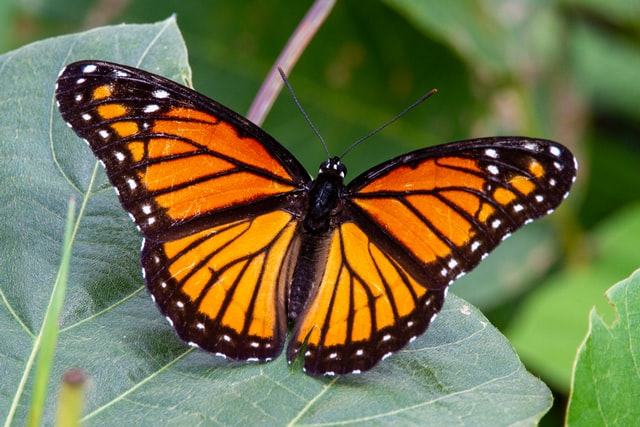

In [ ]:
img

## Матричное представление изображения

Мы знаем, что цветное изображение состоит из 3 числовых матриц или трехмерного тензора. Каждая матрица соответствует одному из 3 базовых цветов: красному, зеленому и синему.

In [ ]:
# получаем трехмерный массив (тензор)
img_matrix = np.array(img)

#(высота, ширина, число каналов)
img_matrix.shape

(427, 640, 3)

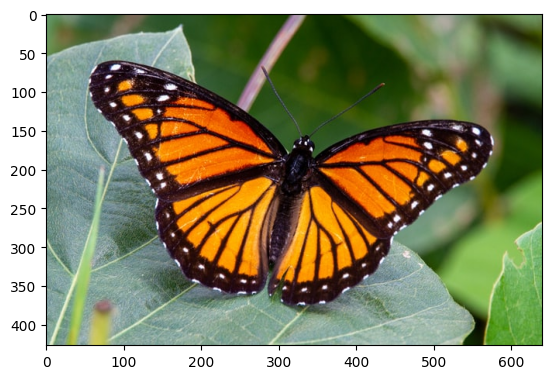

In [ ]:
plt.imshow(img_matrix)
plt.show()

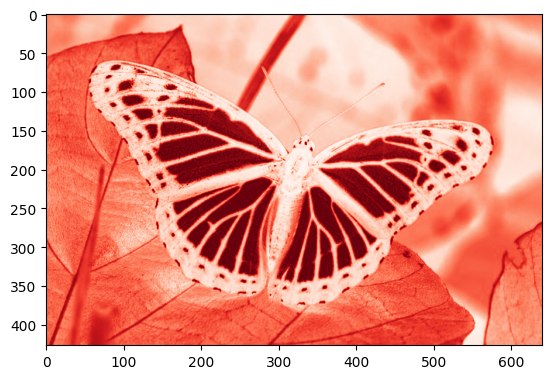

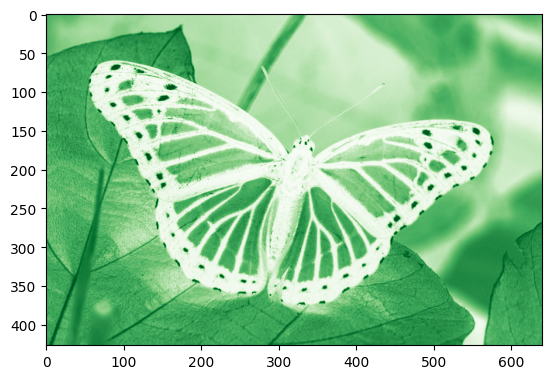

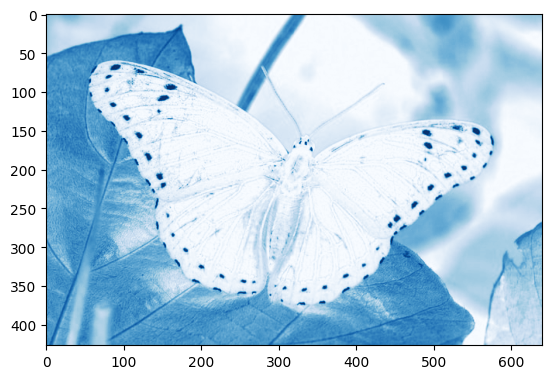

In [ ]:
plt.imshow(img_matrix[:, :, 0], cmap=cm.Reds)
plt.show()

plt.imshow(img_matrix[:, :, 1], cmap=cm.Greens)
plt.show()

plt.imshow(img_matrix[:, :, 2], cmap=cm.Blues)
plt.show()

# Операция свертки

В PyTorch свёрточный слой представлен в модуле `nn` функцией [`Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) с параметрами:
- количество входных каналов `in_channels`
- количество выходных каналов `out_channels`
- размер ядра `kernel_size`
- шаг `stride`
- паддинг `padding`
- режим паддинга `padding_mode` (`'zeros'`, `'reflect'` и др.)
- `dilation`

**Размер ядра** - `int`, если ядро квадратное и кортеж из двух чисел, если ядро прямоугольное. Задает размер фильтра, с которым производится свертка изображения.

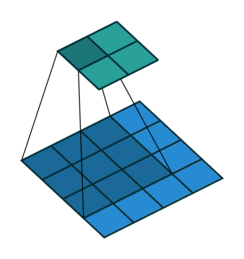
Эта и следующие анимации взяты [здесь](https://github.com/vdumoulin/conv_arithmetic)

**Шаг** - задает шаг, в пикселях, на который сдвигается фильтр. `int`, если по горизонтали и вертикали сдвигается на одно и то же число. Кортеж из двух чисел, если сдвиги разные.

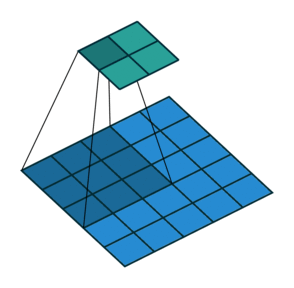
Шаг: 2

**Паддинг** - количество пикселей, которыми дополняется изображение. Аналогично шагу и размеру ядра, может быть, как `int`, так и кортежем из двух чисел.

**Half pading**
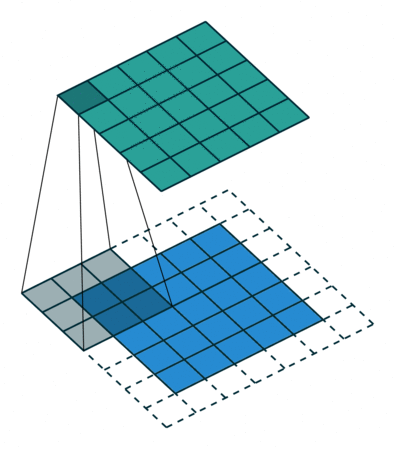

# Свертка изображения

[Почитать подробно](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215) как работает conv2d.


Применим оператор Собеля для детектирования границ на изображении.

In [ ]:
import torch
from torch.nn.functional import conv2d

Конвертируем изображение в нужный формат для PyTorch

In [ ]:
img_tensor = torch.tensor([img_matrix], dtype=torch.float)
img_tensor.size() #(число изображений, высота, ширина, число каналов)

<ipython-input-11-6c83e8bcdb38>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  img_tensor = torch.tensor([img_matrix], dtype=torch.float)


torch.Size([1, 427, 640, 3])

In [ ]:
img_tensor = img_tensor.permute(0, 3, 1, 2)
img_tensor.size() #(число изображений, число каналов, высота, ширина)

torch.Size([1, 3, 427, 640])

Зададим оператор Собеля для детектирования горизонтальных границ

In [ ]:
sobel_hor = [[-1, -2, -1],
             [ 0,  0,  0],
             [ 1,  2,  1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_hor, sobel_hor, sobel_hor]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [ ]:
img_conv_hor = conv2d(img_tensor, kernel)

img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 425, 638, 1])

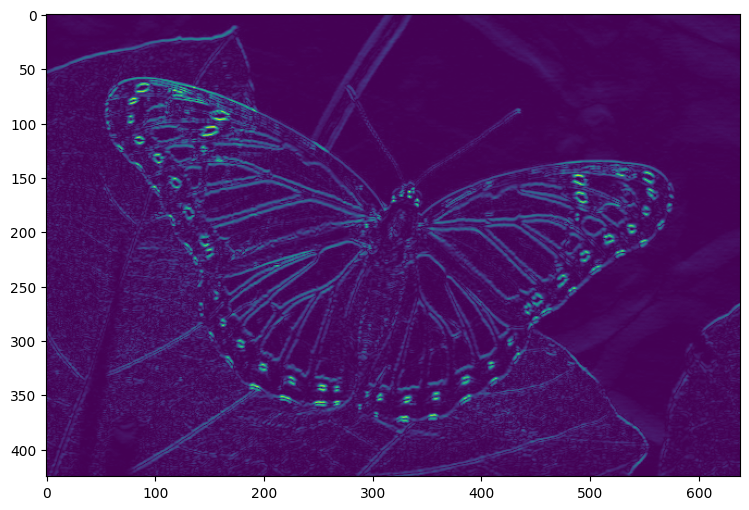

In [ ]:
plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show()

Зададим оператор Собеля для детектирования вертикальных границ

In [ ]:
sobel_ver = [[-1, 0, 1],
             [-2, 0, 2],
             [-1, 0, 1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_ver, sobel_ver, sobel_ver]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [ ]:
img_conv_ver = conv2d(img_tensor, kernel)

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)
img_conv_ver.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 425, 638, 1])

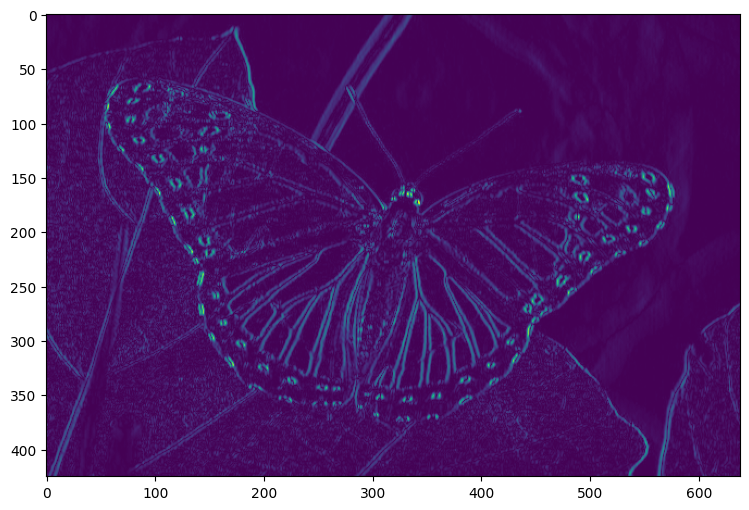

In [ ]:
plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

Объединим два изображения

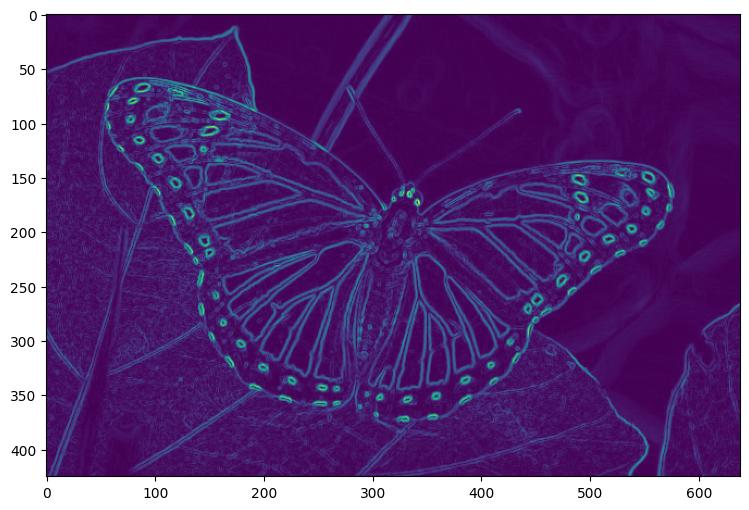

In [ ]:
img_conv = torch.sqrt(img_conv_ver**2 + img_conv_hor**2)

plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(img_conv[0, :, :, 0])
plt.show()

### Задание (самостоятельное)
По аналогии с примером выше, сверните изображение со случайным ядром такого же размера.

**Подсказка:** используйте `torch.rand()`.

In [ ]:
# ваш код здесь

# Полносвязная нейронная сеть

Решим задачу классификации изображений полносвязной нейронной сетью.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

Скачаем и подготовим данные для классификации.

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])

In [ ]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST('./mnist/', train=True, download=True, transform=transform)

# используем готовый класс от торча для загрузки данных для валидации
mnist_val = torchvision.datasets.MNIST('./mnist/', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 74250827.32it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 96908555.06it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33613734.39it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 958324.30it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [ ]:
# так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

# так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

Пример изображений

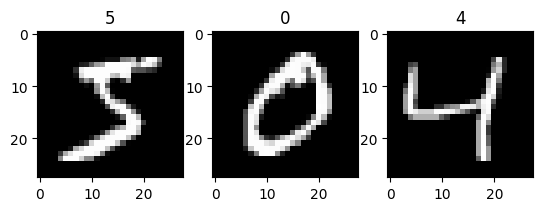

In [ ]:
for i in [0, 1, 2]:
    plt.subplot(1, 3, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]),cmap='gray')
    plt.title(str(mnist_train[i][1]))
plt.show()

Обучаем полносвязную нейронную сеть для классификации изображений

In [ ]:
model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10) # функция активации релу
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # создаем оптимизатор и передаем туда параметры модели

In [ ]:
def train(model, optimizer):
    epoch = 0
    for epoch in range(0,4): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
        for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
            y_pred = model(x_train) # делаем предсказания
            loss = nn.CrossEntropyLoss()(y_pred, y_train) # считаем лосс
            loss.backward() # считаем градиенты обратным проходом
            optimizer.step() # обновляем параметры сети
            optimizer.zero_grad() # обнуляем посчитанные градиенты параметров

        # валидация
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader): # берем батч из вал лоадера
                y_pred = model(x_val) # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val) # считаем лосс
                mean_val_loss.append(loss.numpy()) # добавляем в массив
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) # выводим статистику

In [ ]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.2407715916633606, accuracy: 0.9309


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, loss: 0.144024059176445, accuracy: 0.9577


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.11260828375816345, accuracy: 0.9662


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, loss: 0.09130508452653885, accuracy: 0.9735


# Сверточный слой

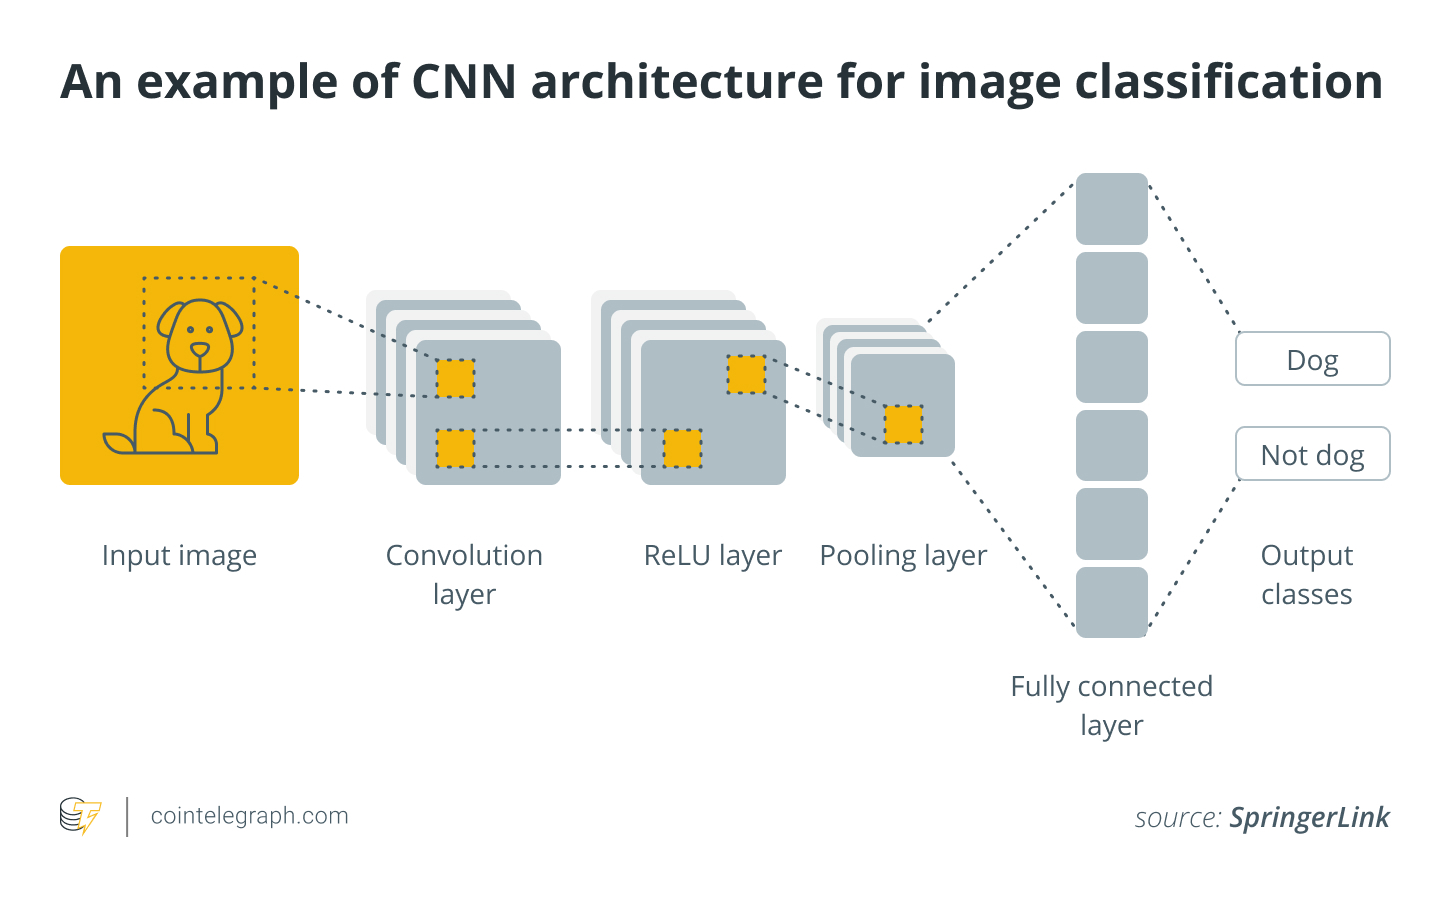

Добавим в нашу сеть сверточный слой. Обратите внимание на то, как изменится качество классификации.

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5), # добавим сверточный слой с 10 ядрами
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),  # уменьшим картинку в 4 раза по каждой стороне
    nn.Flatten(),                 # превращаем картинку 6х6х10 в вектор размером 360
    nn.Linear(6*6*10, 128),       # линейный слой, преобразующий вектор размера 360 в вектор размера 128
    nn.ReLU(),                    # нелинейность
    nn.Linear(128, 10),           # отображение в пространство рамерности числа меток классификации
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.23203447461128235, accuracy: 0.9343


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, loss: 0.14340607821941376, accuracy: 0.9579


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.1261354386806488, accuracy: 0.9591


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, loss: 0.08976507186889648, accuracy: 0.9727


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07901144027709961, accuracy: 0.9752


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, loss: 0.068788081407547, accuracy: 0.9788


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, loss: 0.06792093813419342, accuracy: 0.9781


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, loss: 0.05834454298019409, accuracy: 0.9821


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, loss: 0.0608365535736084, accuracy: 0.9813


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, loss: 0.061334799975156784, accuracy: 0.9799


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, loss: 0.05167918652296066, accuracy: 0.9839


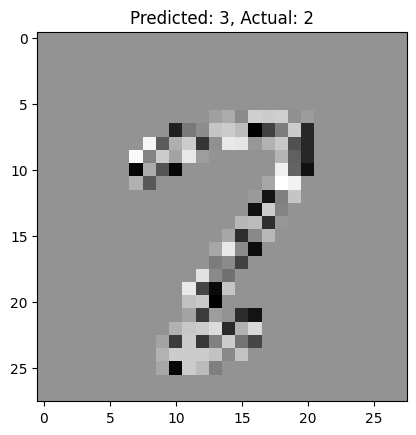

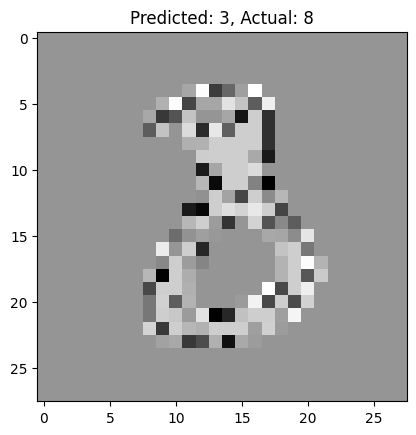

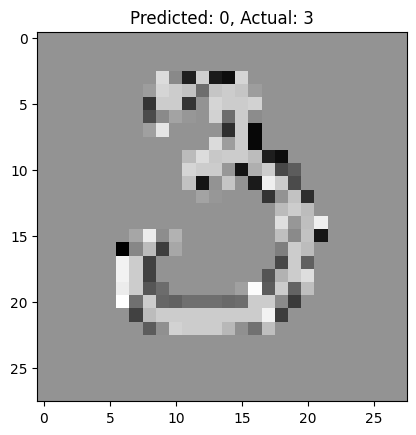

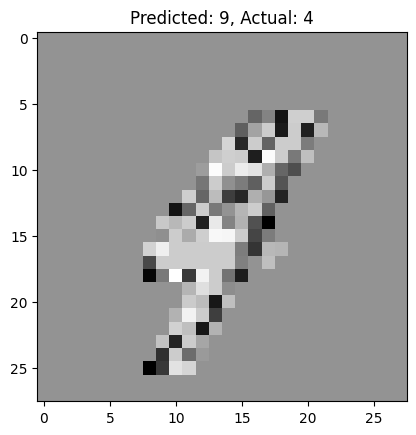

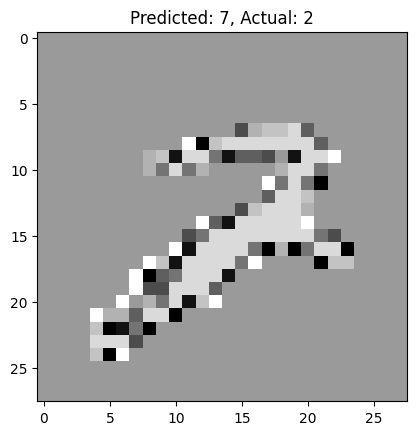

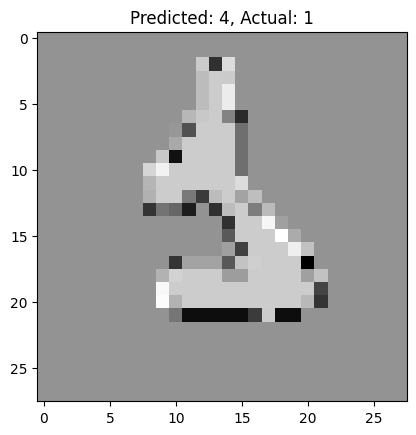

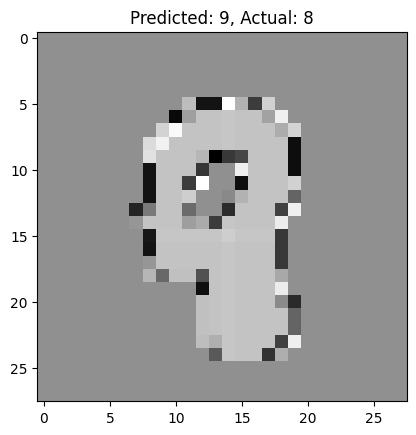

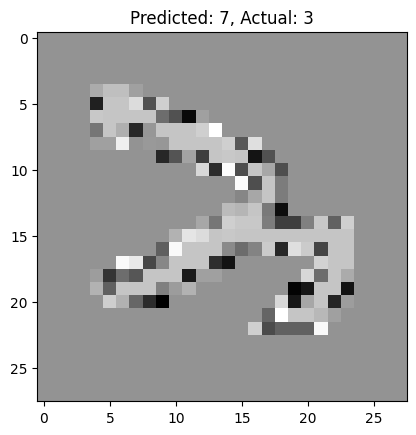

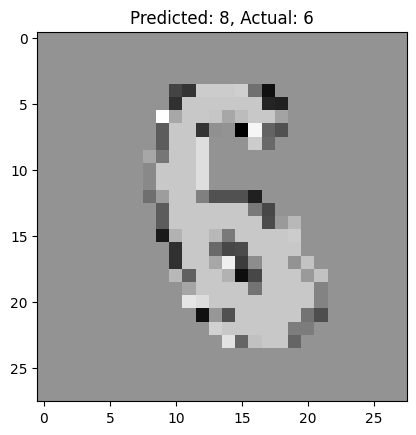

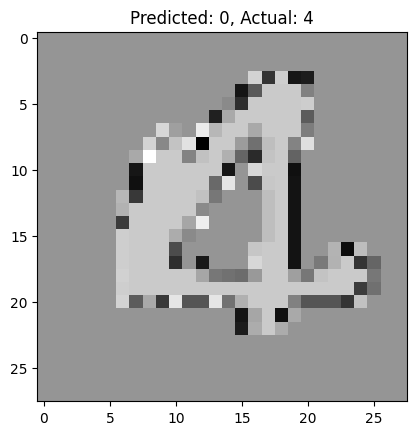

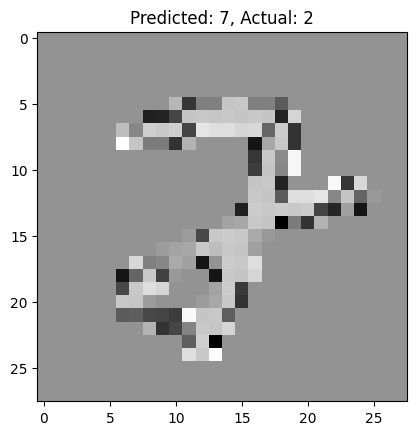

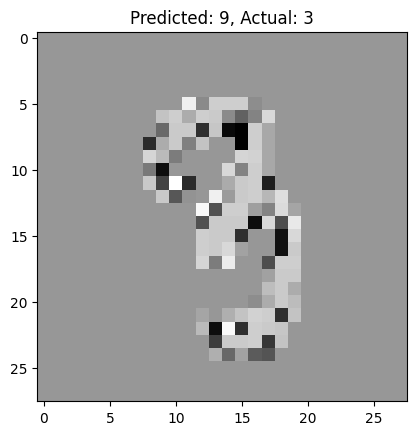

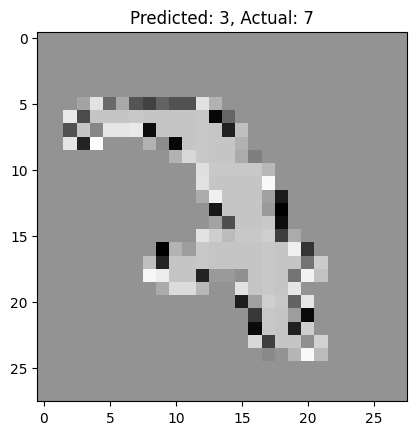

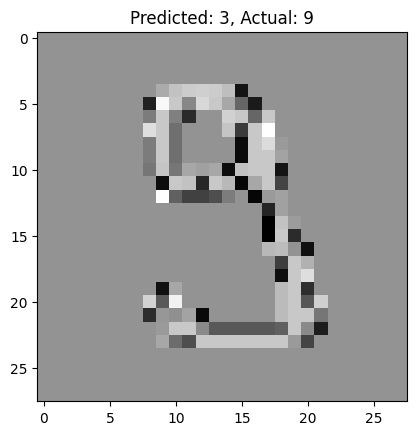

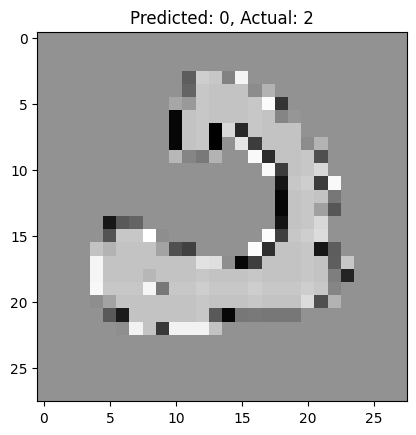

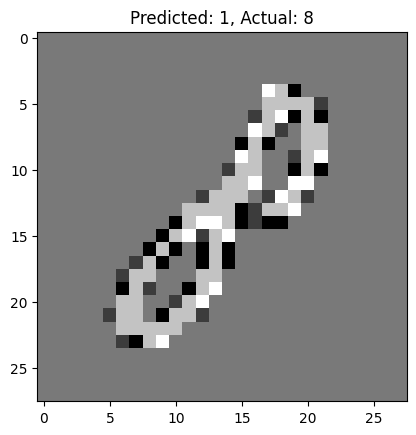

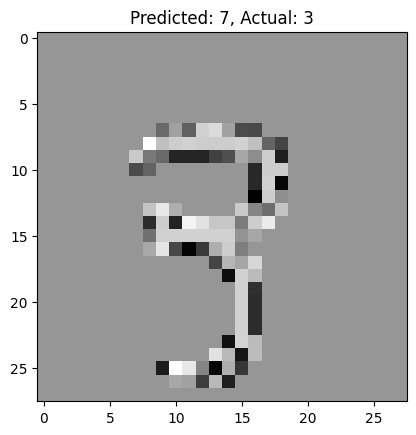

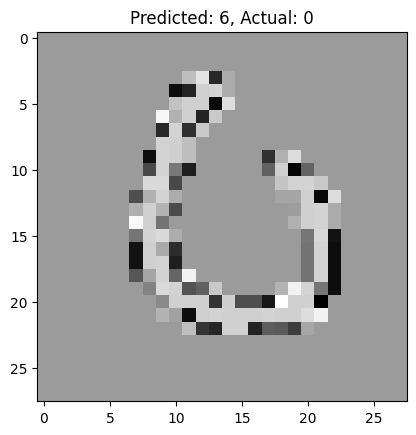

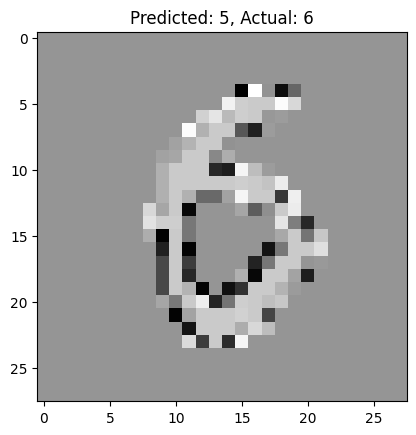

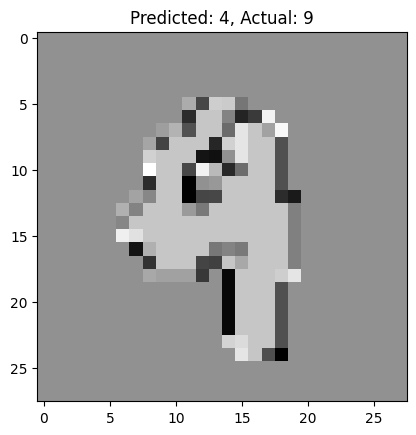

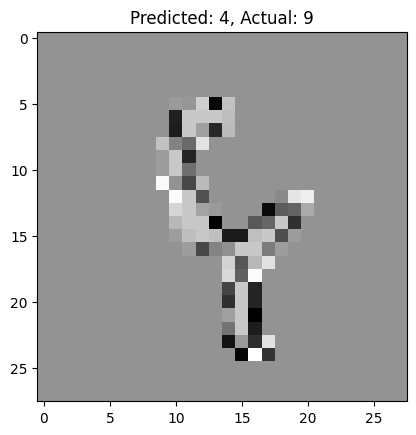

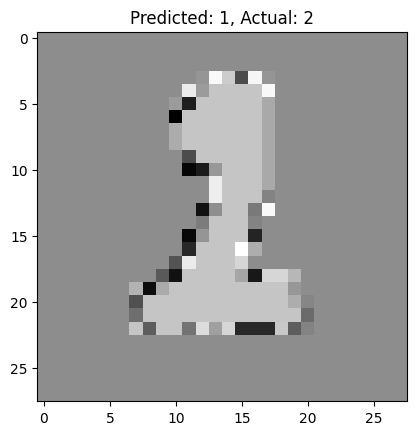

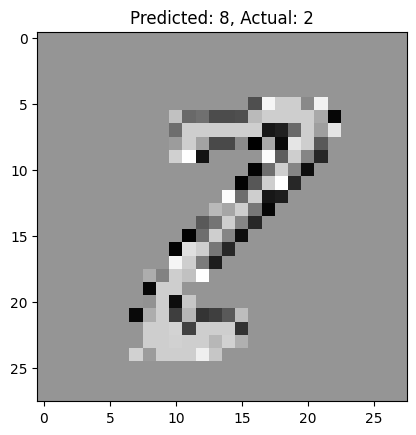

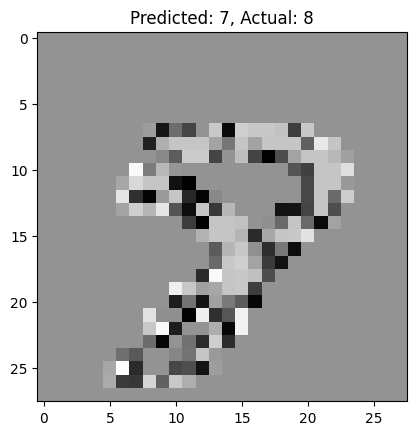

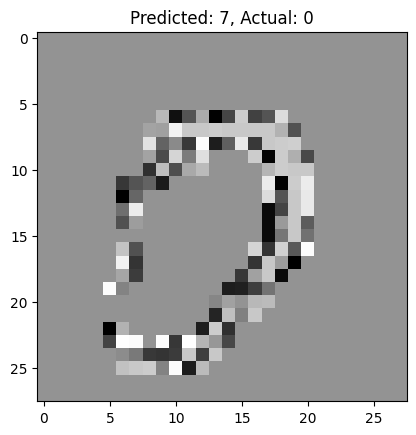

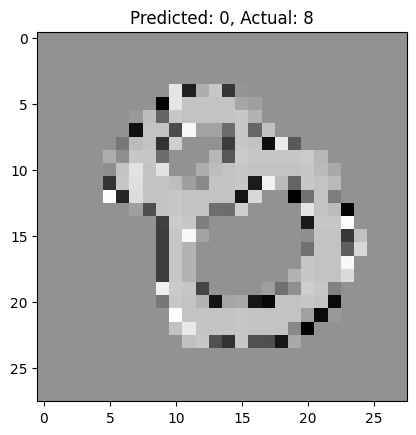

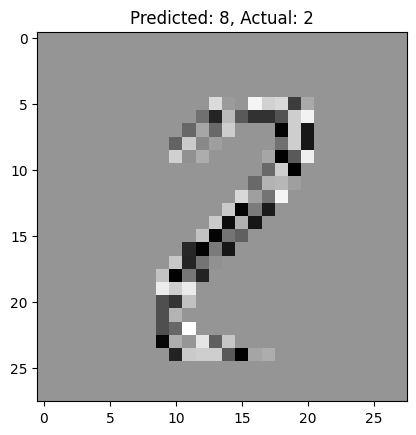

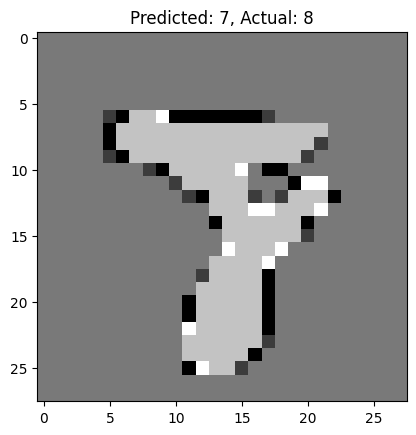

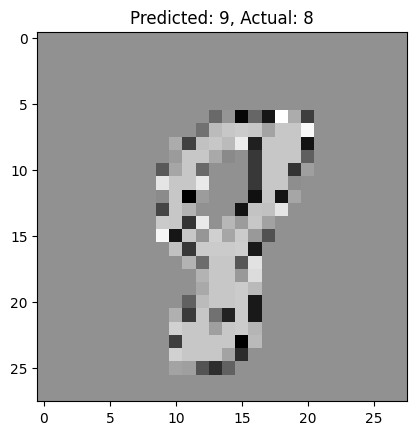

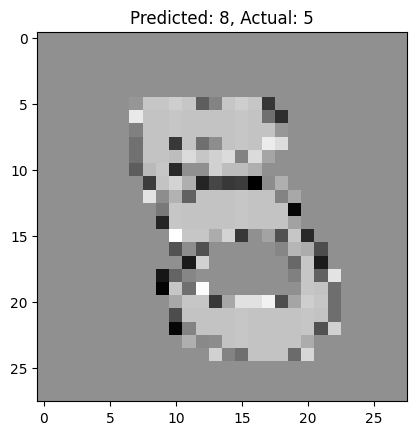

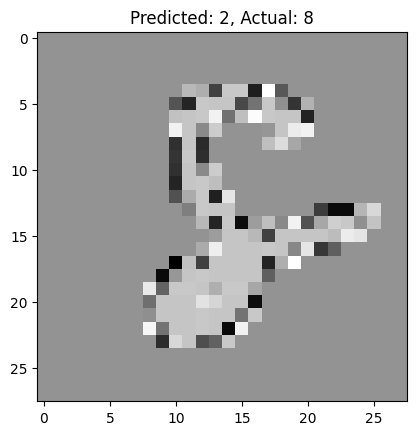

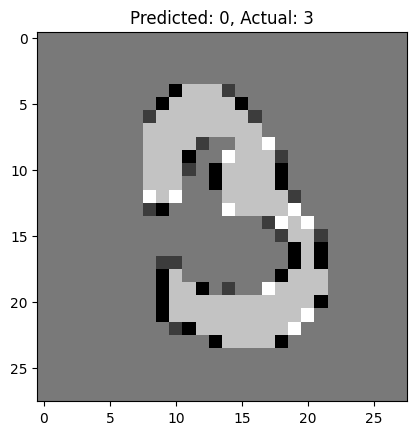

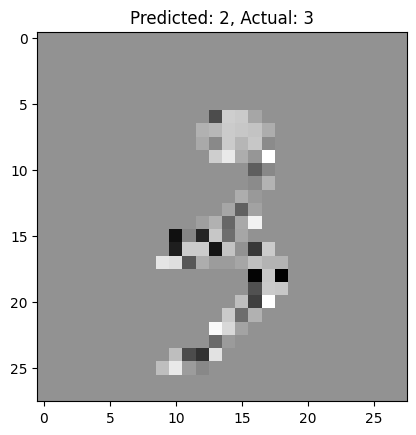

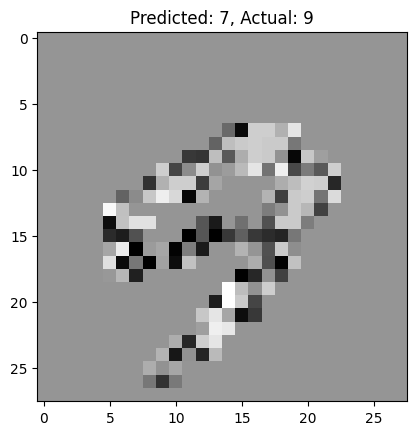

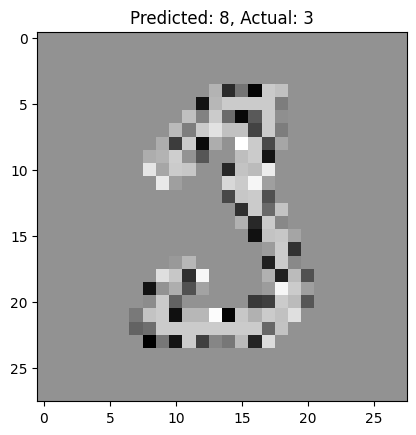

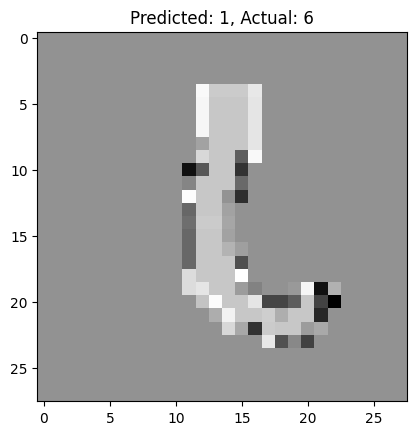

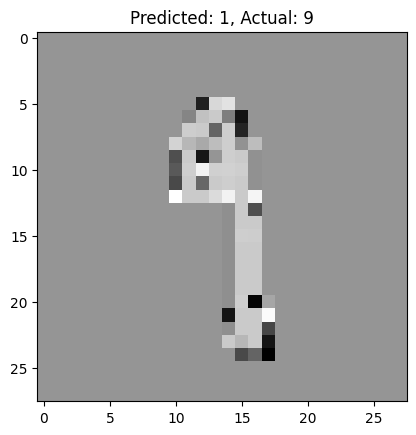

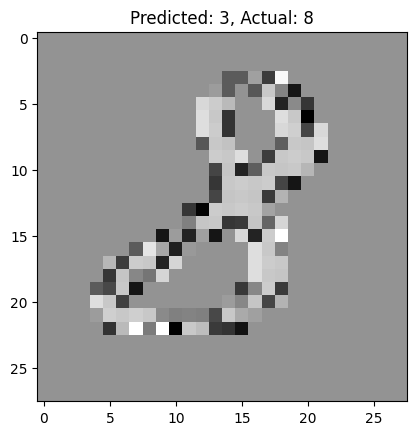

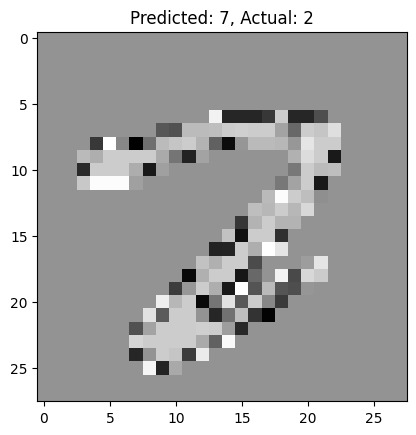

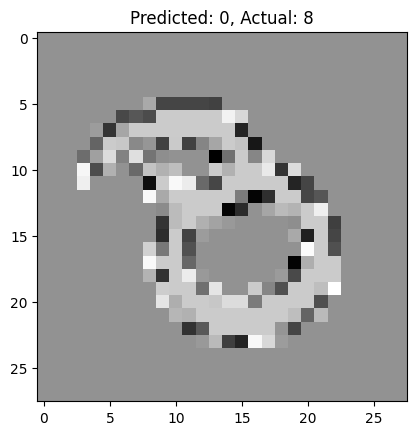

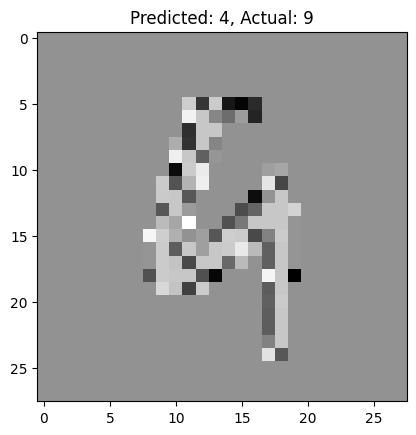

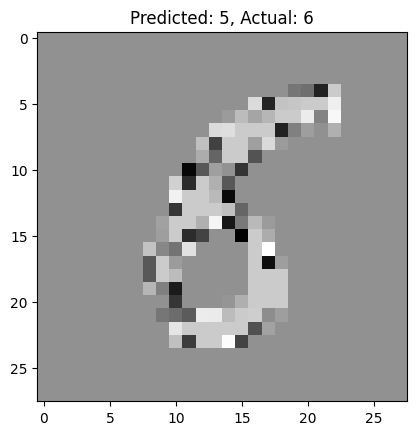

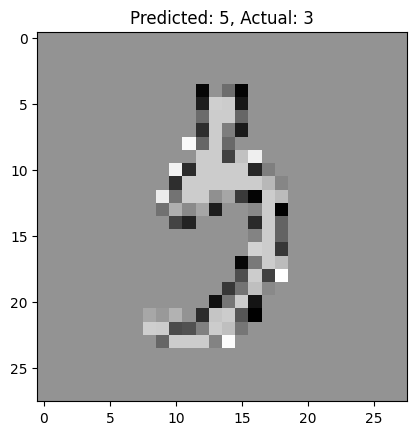

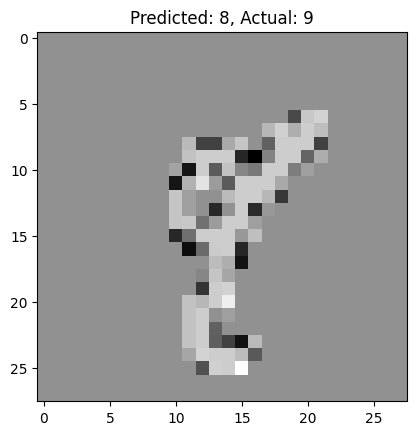

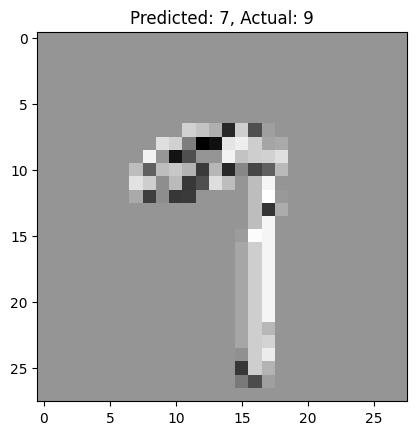

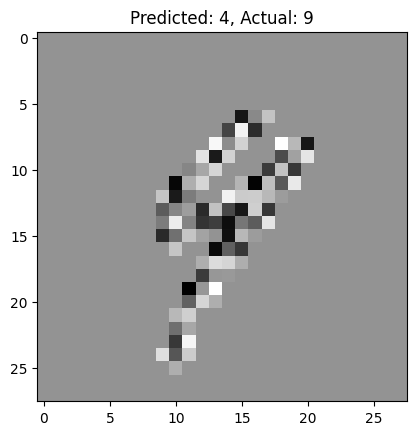

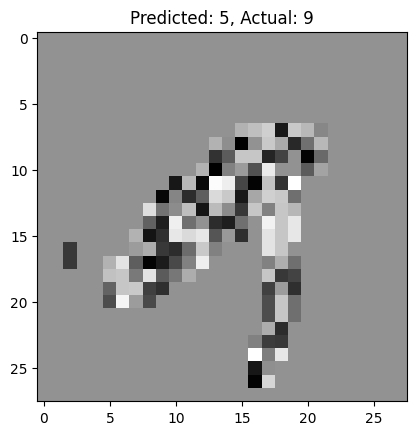

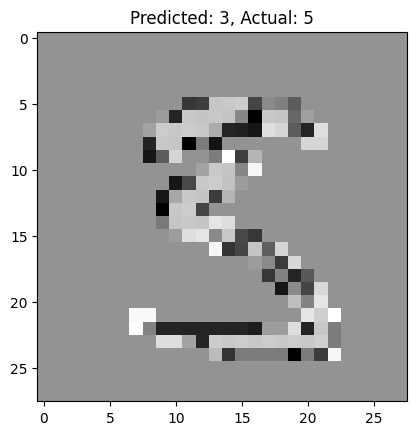

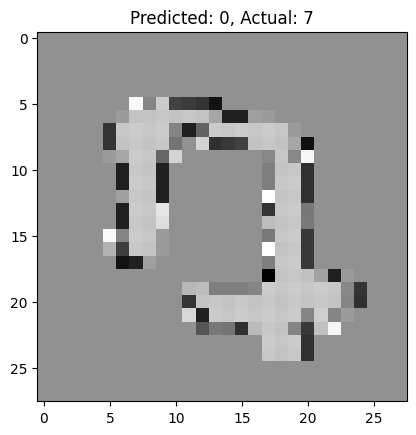

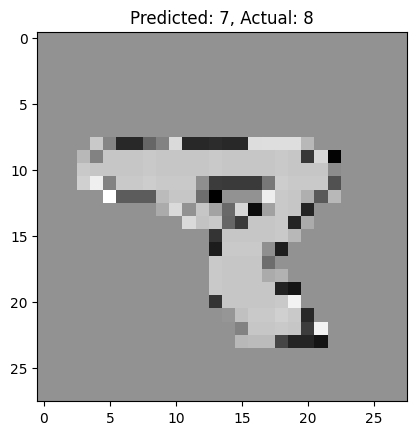

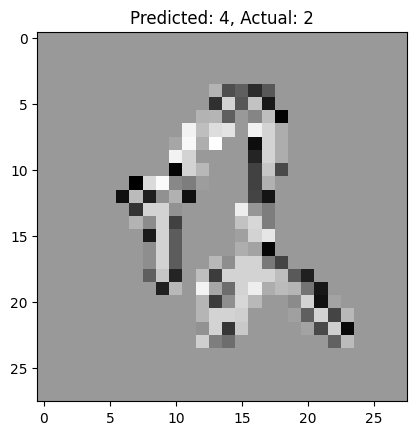

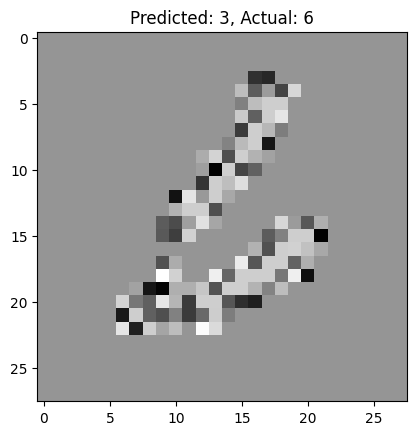

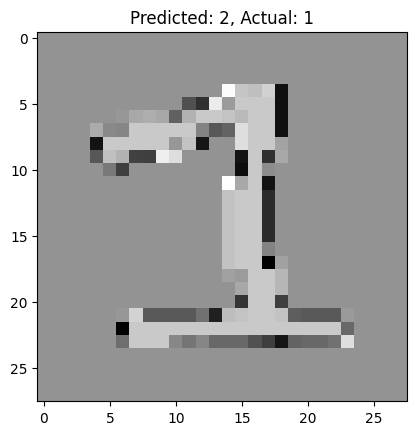

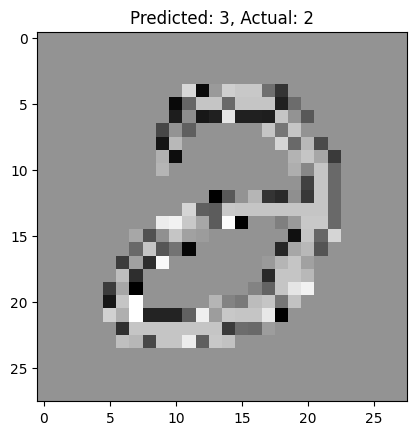

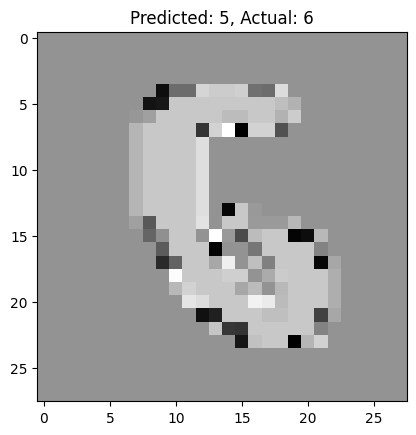

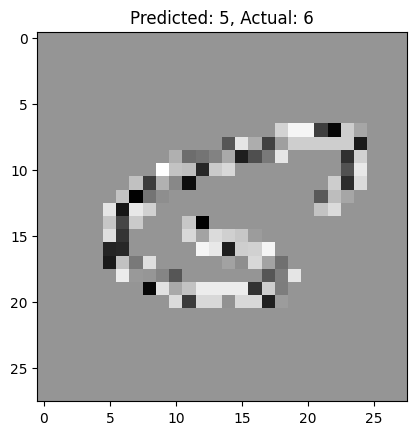

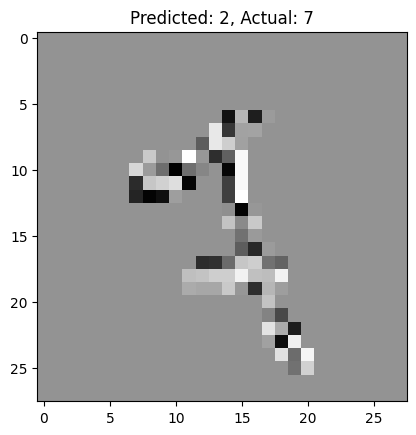

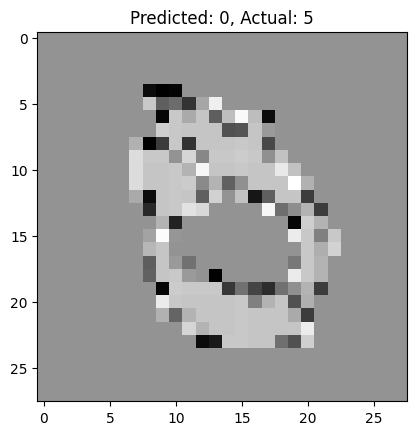

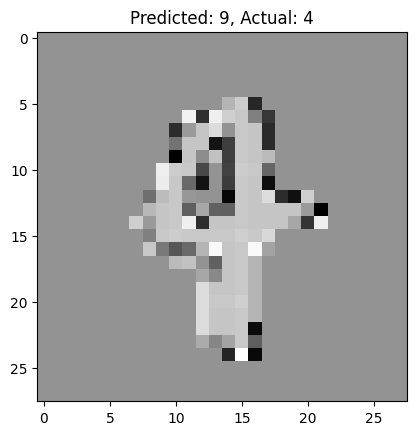

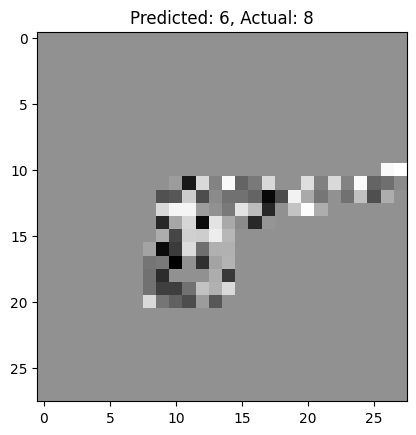

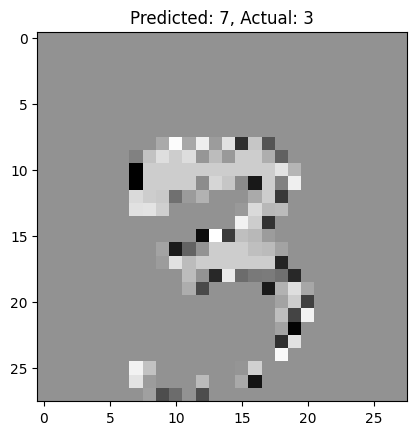

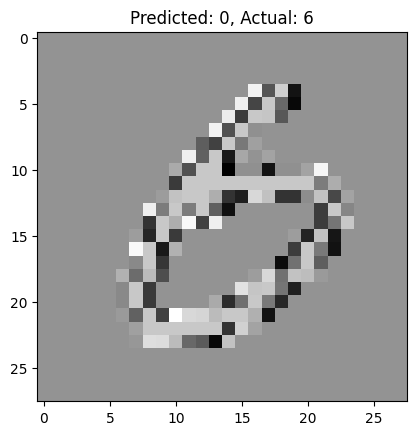

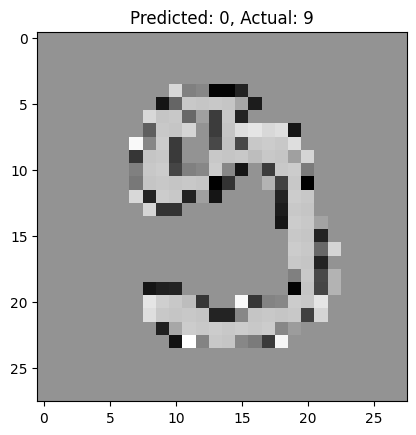

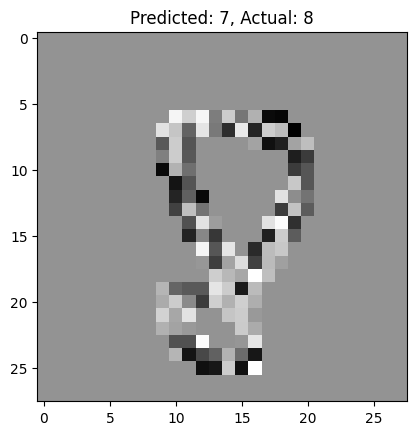

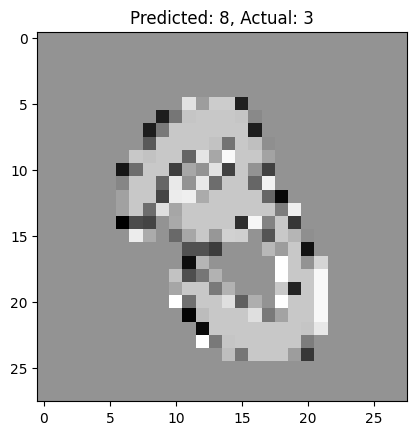

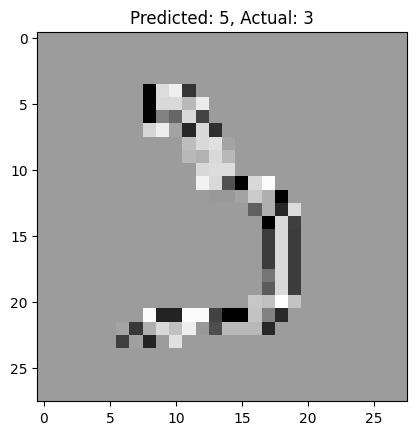

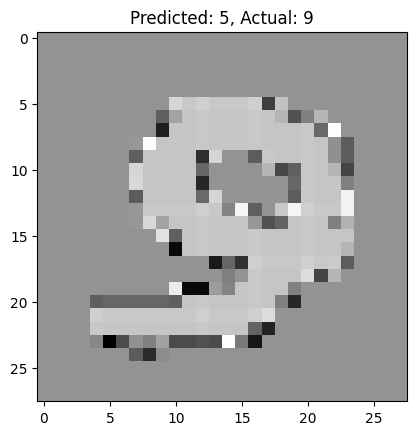

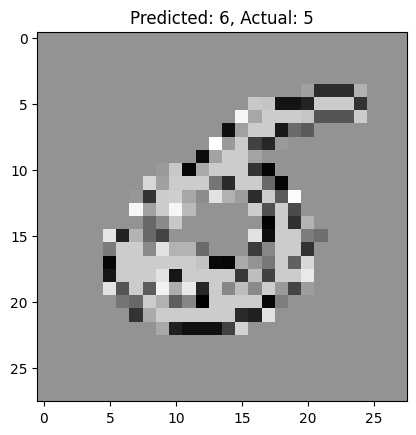

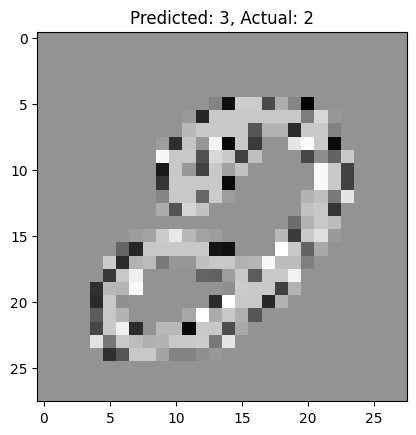

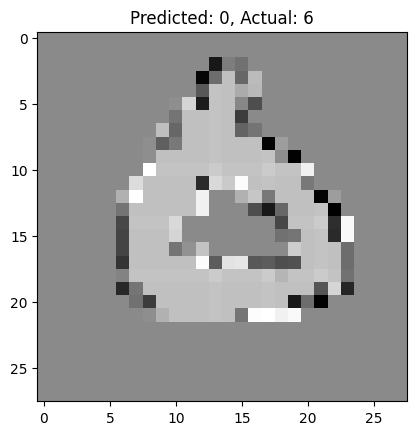

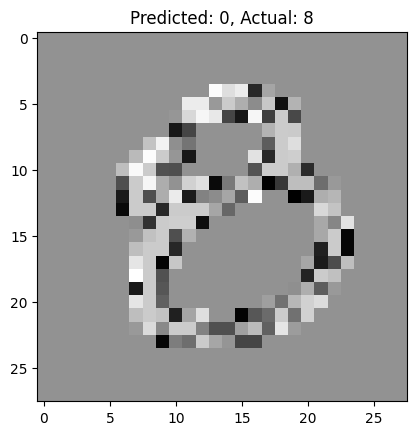

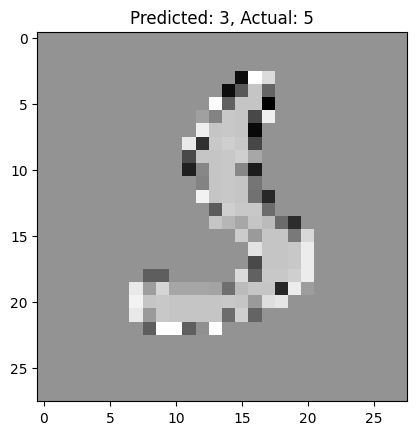

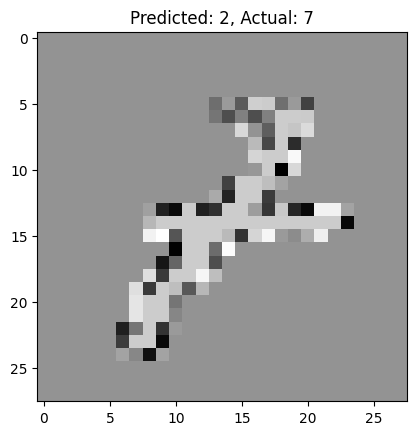

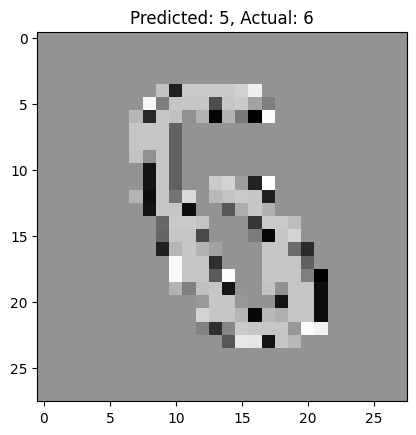

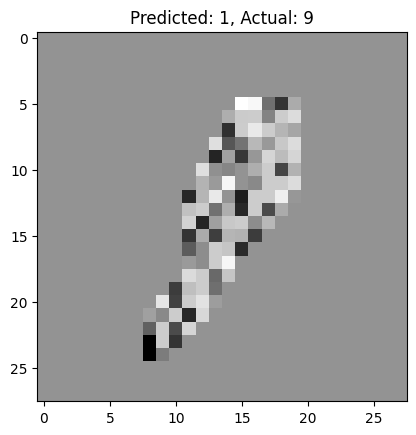

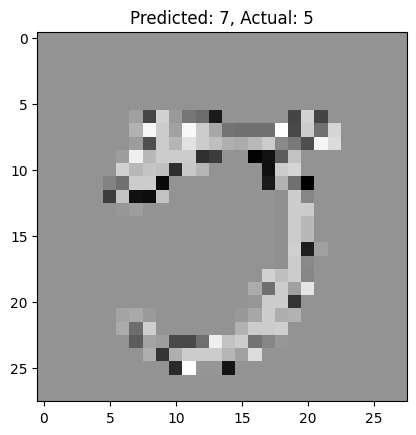

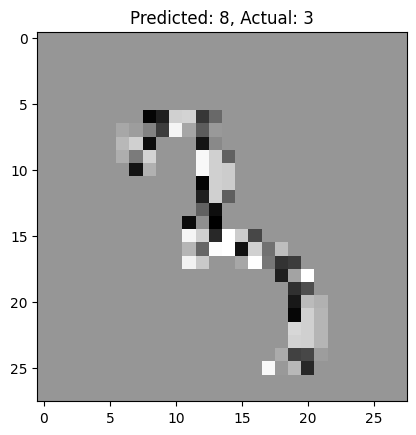

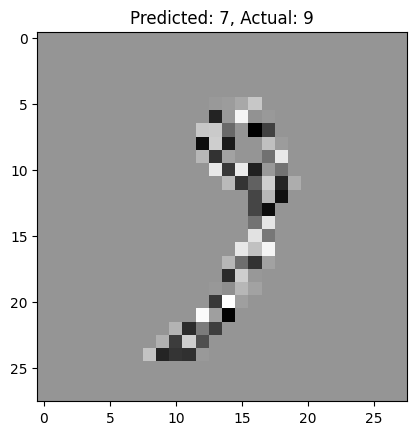

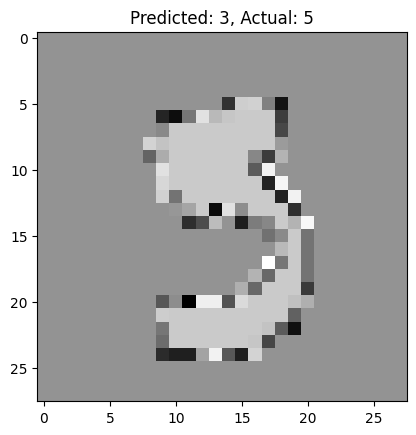

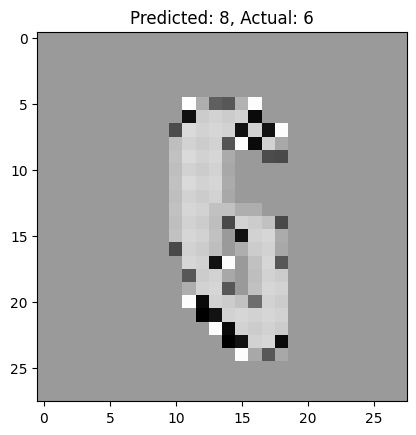

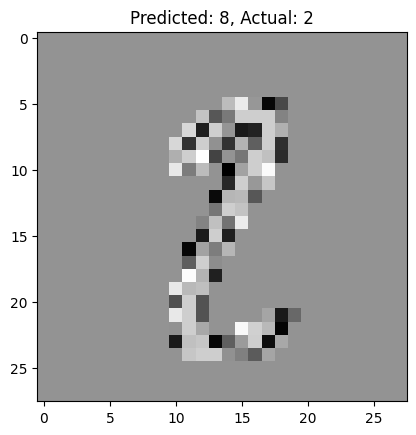

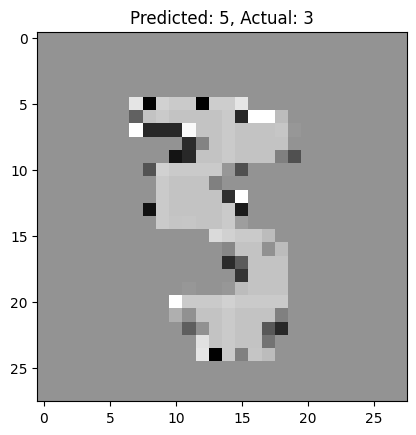

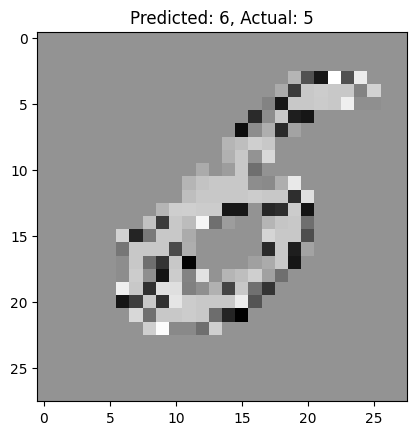

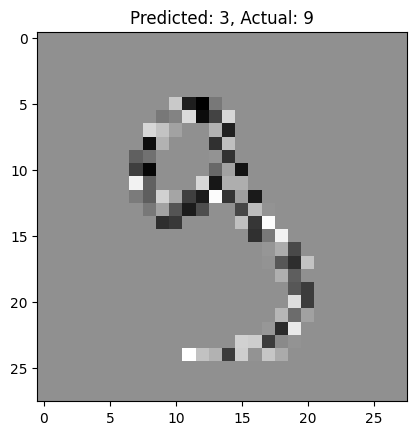

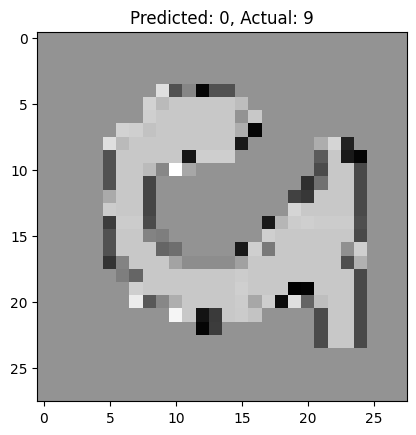

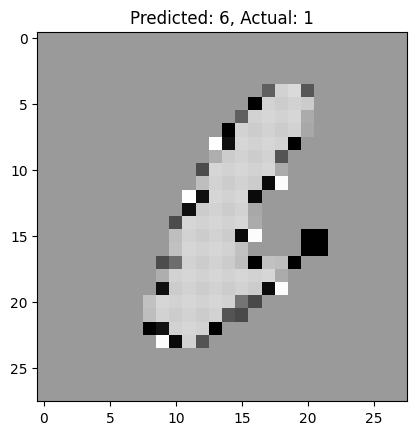

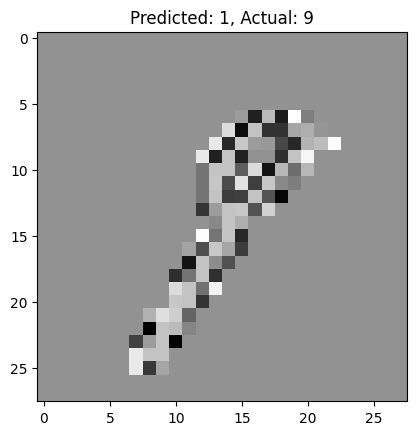

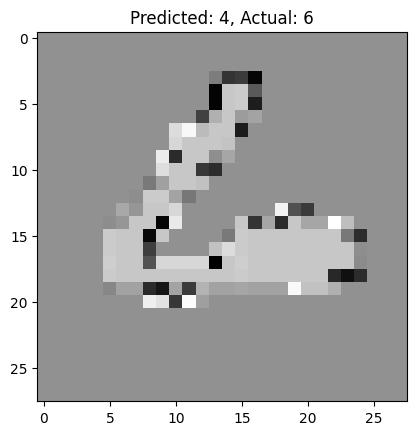

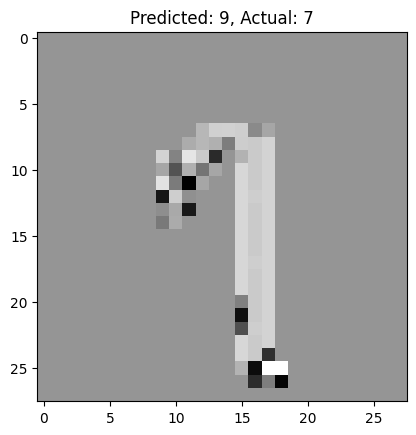

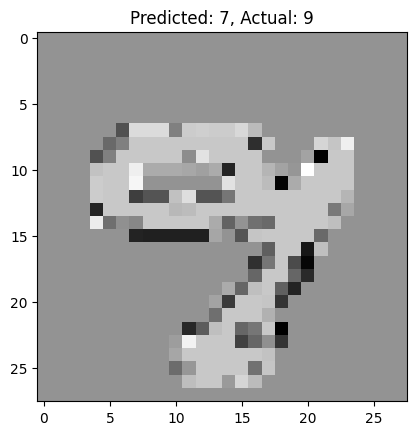

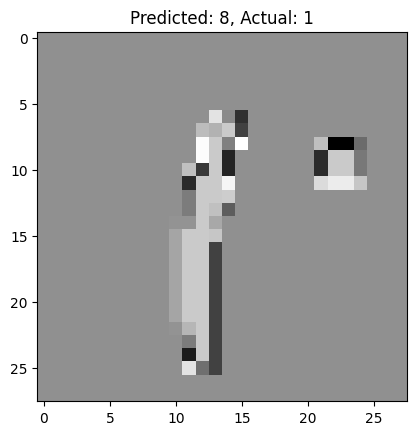

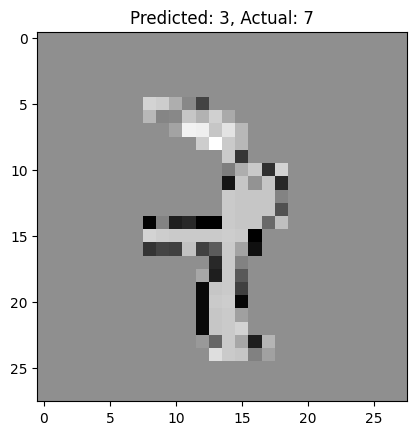

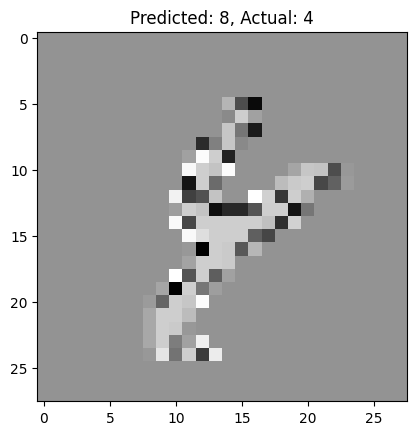

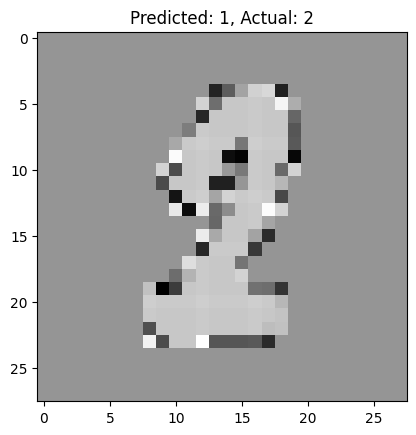

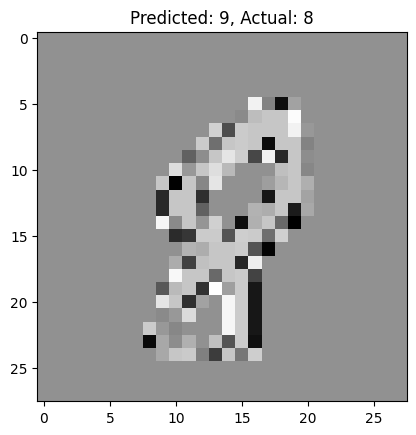

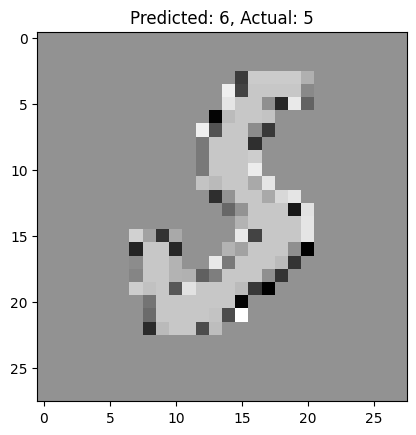

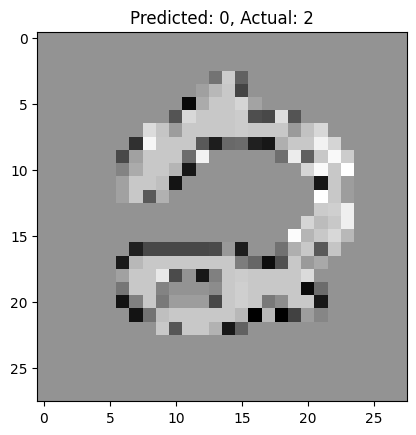

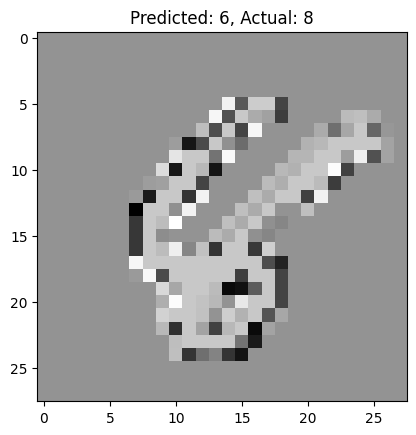

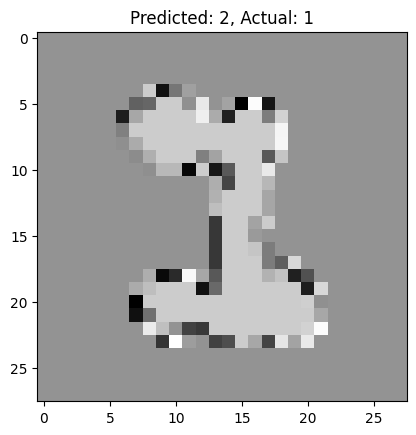

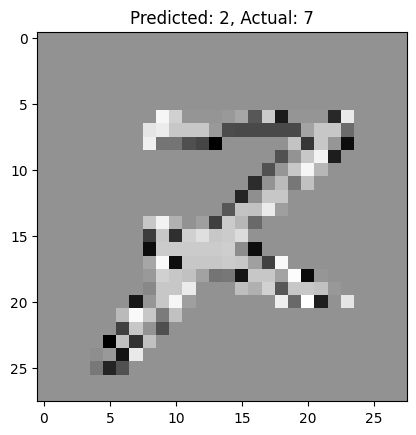

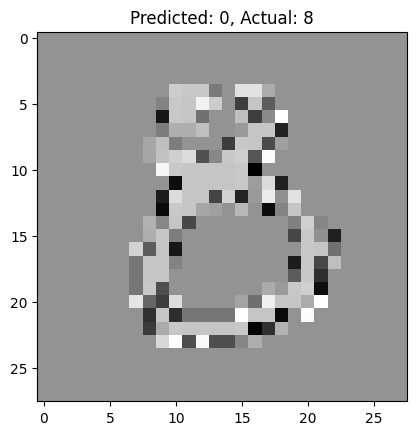

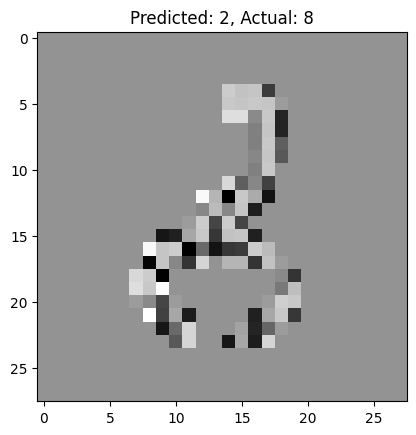

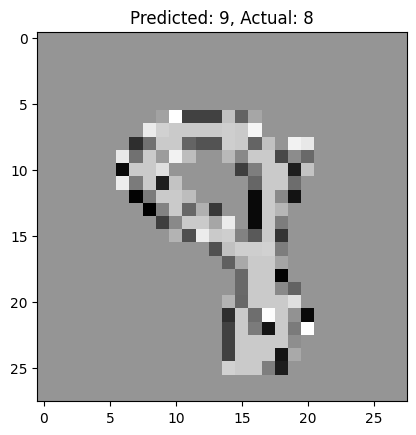

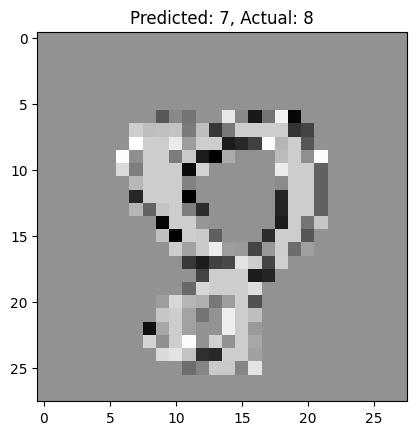

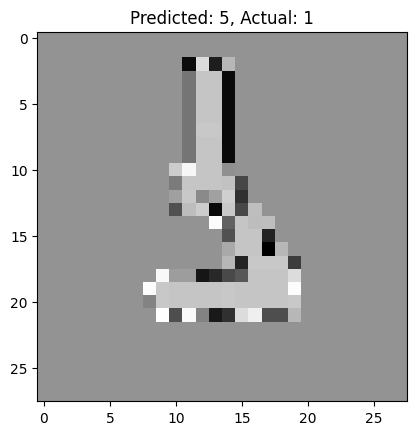

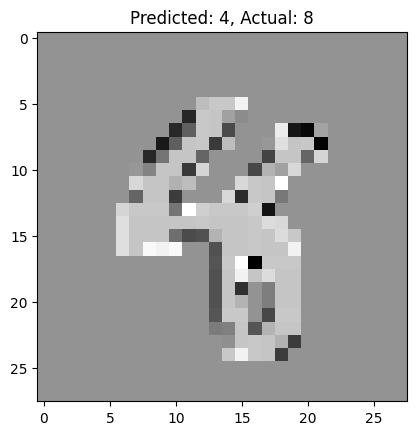

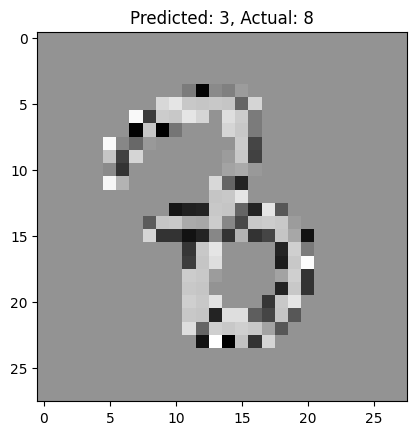

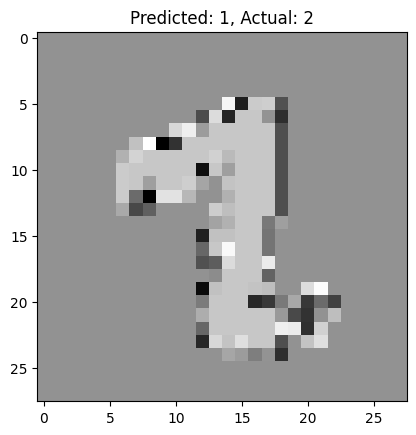

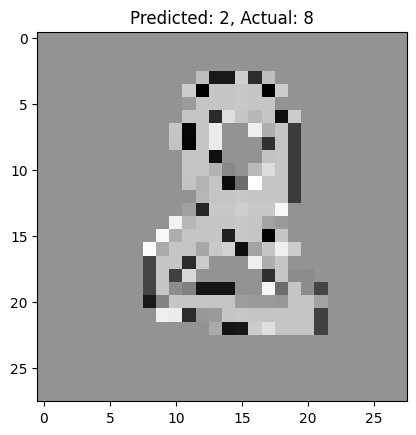

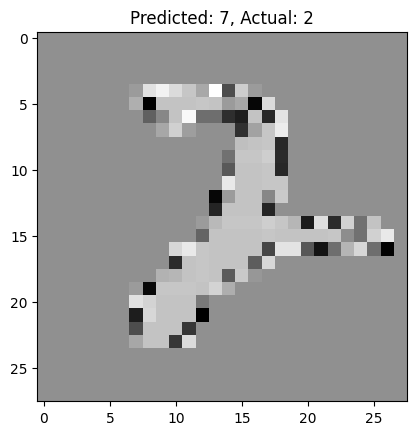

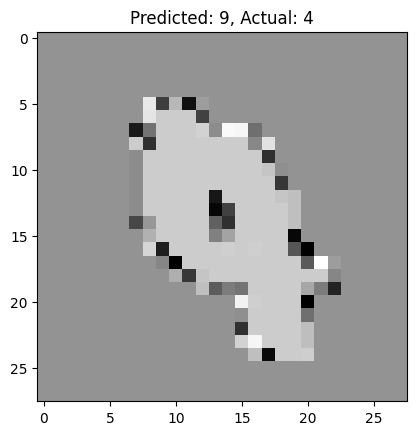

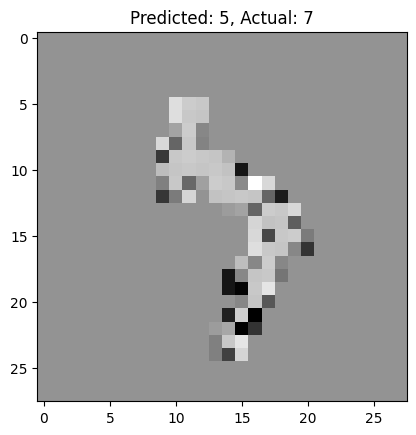

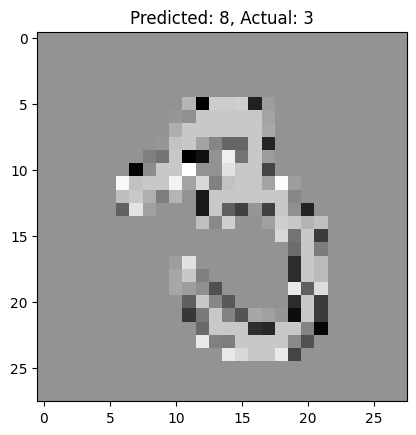

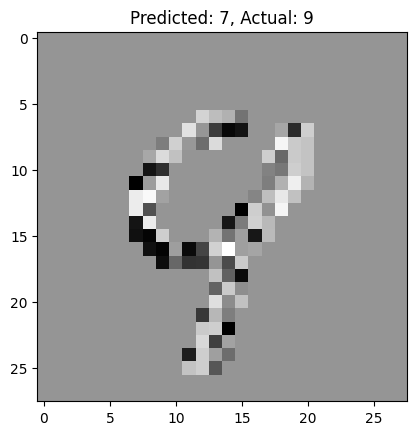

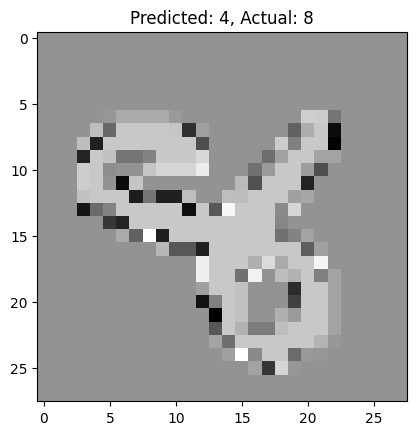

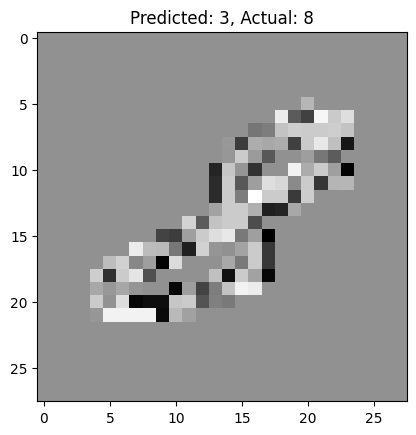

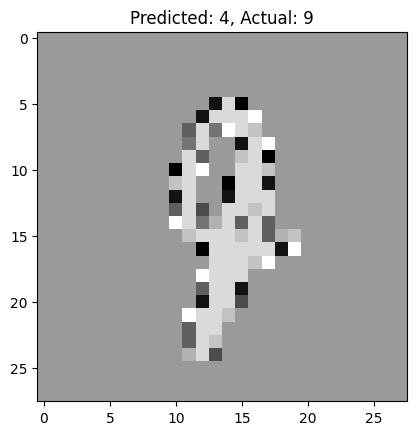

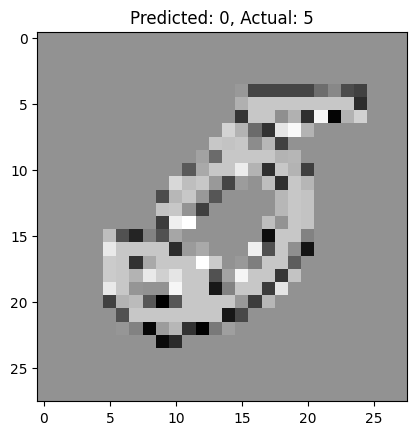

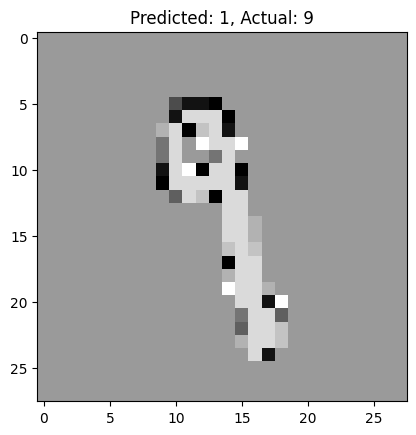

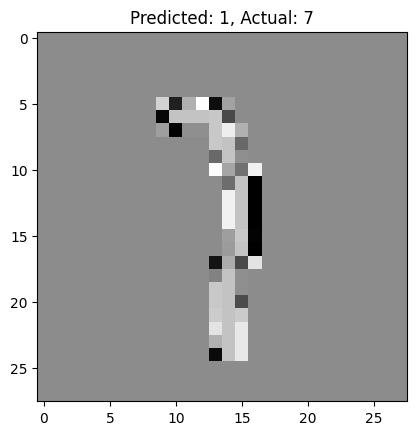

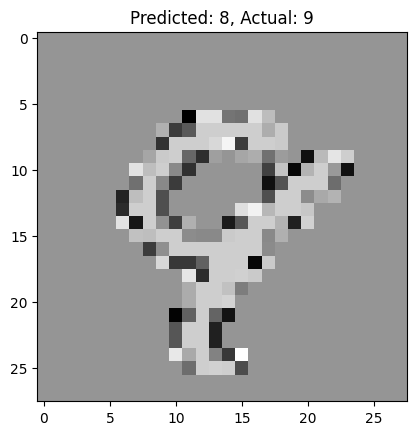

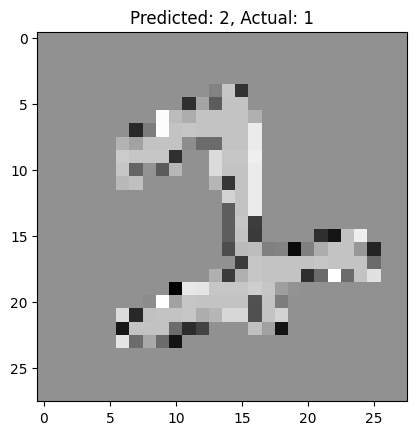

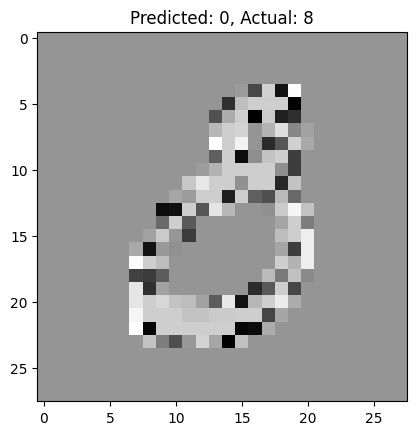

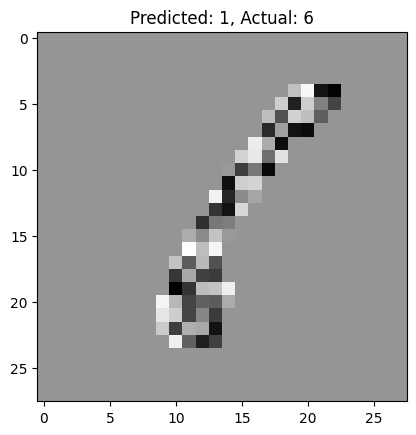

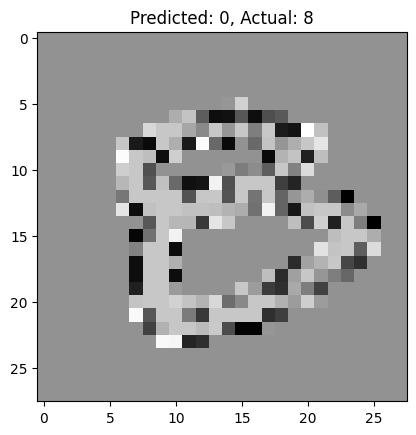

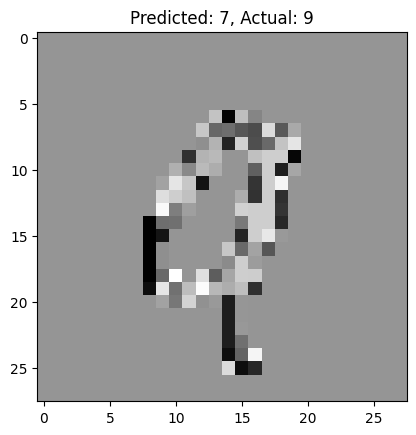

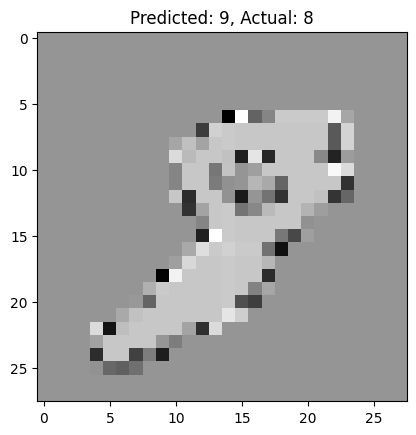

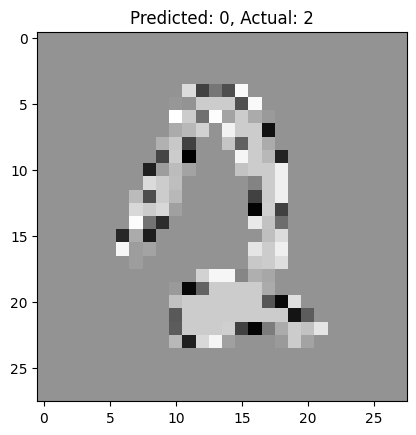

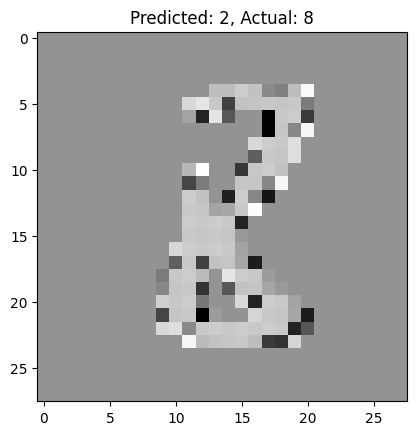

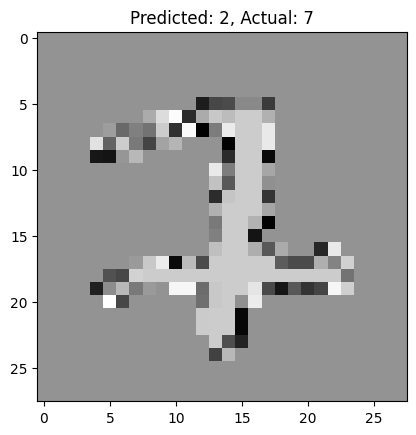

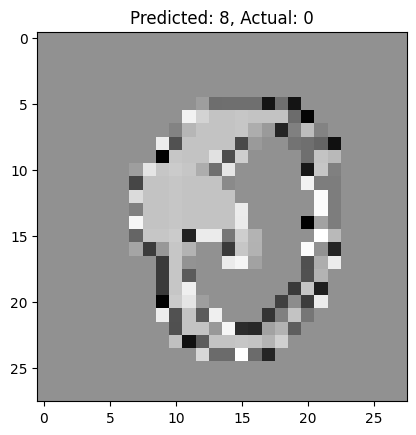

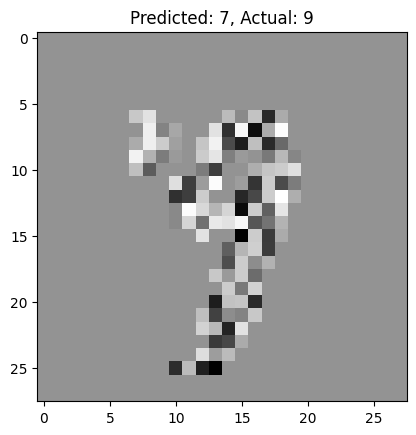

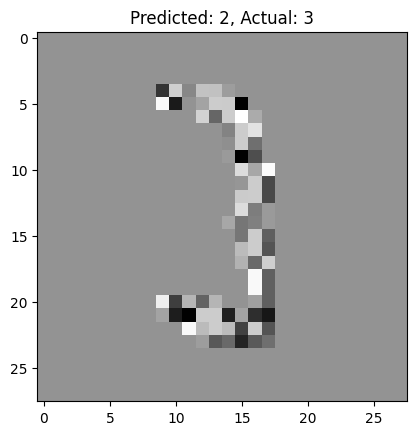

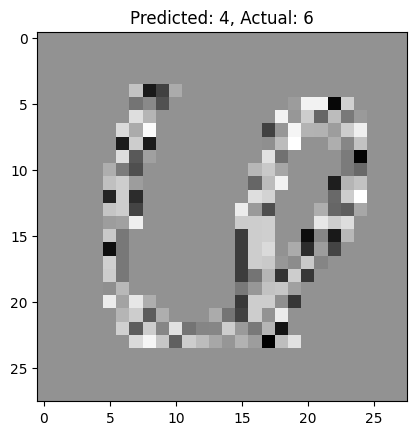

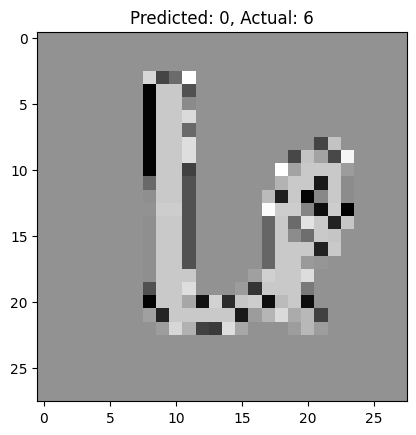

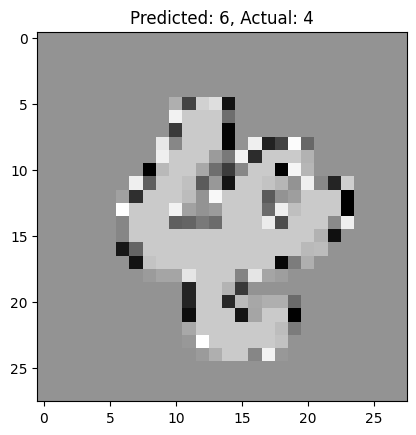

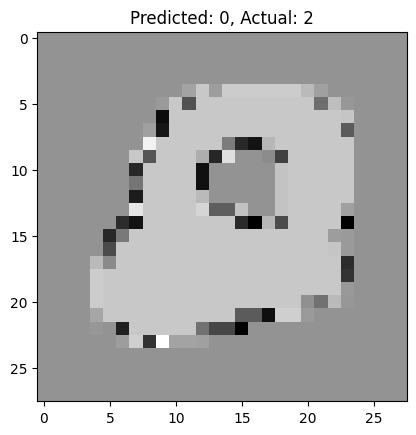

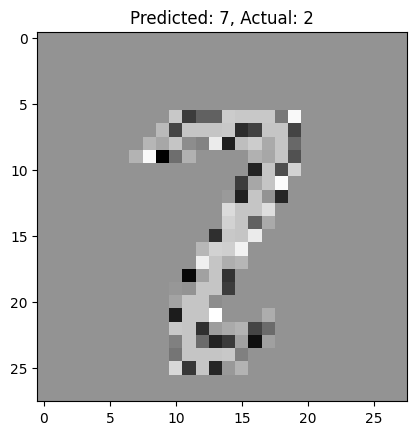

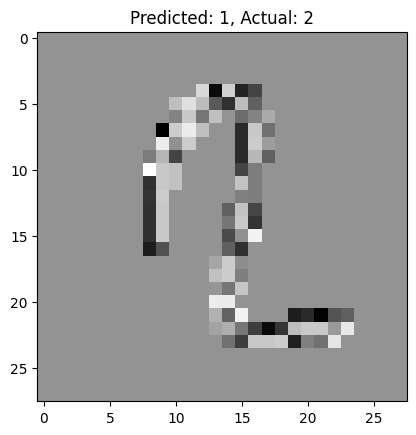

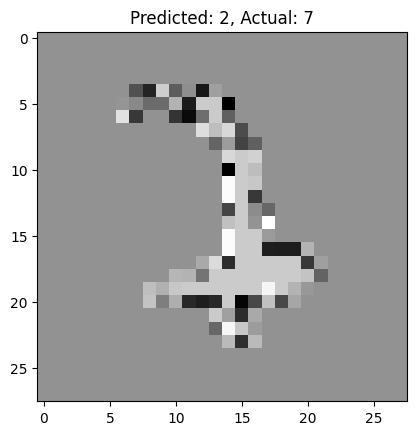

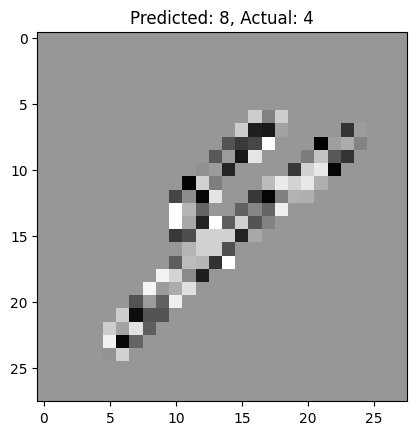

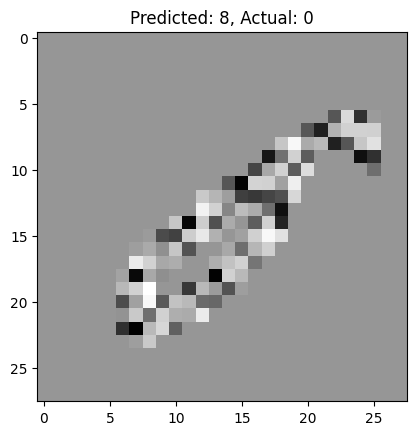

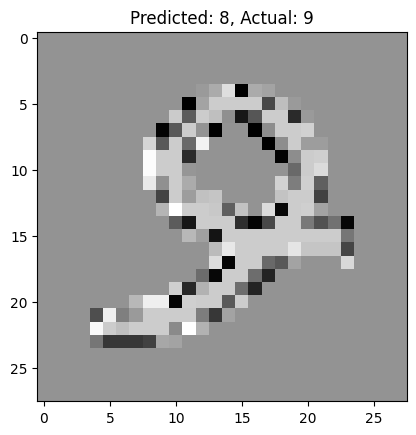

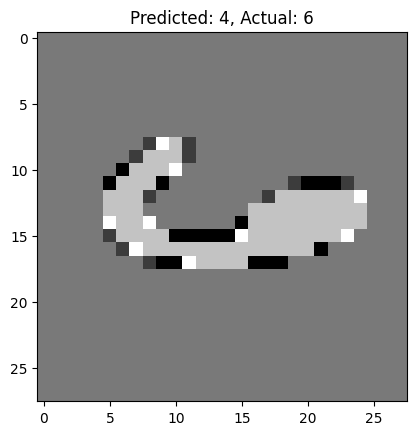

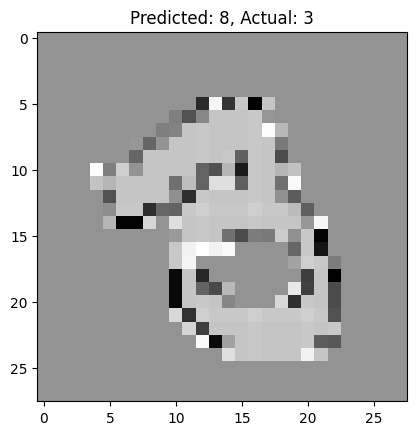

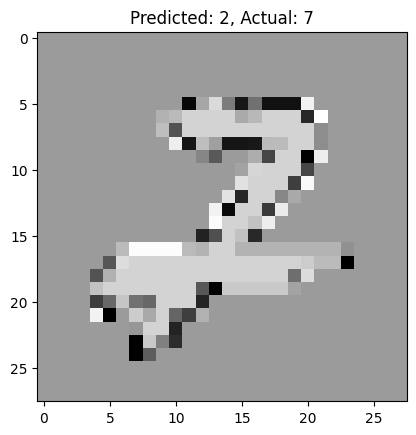

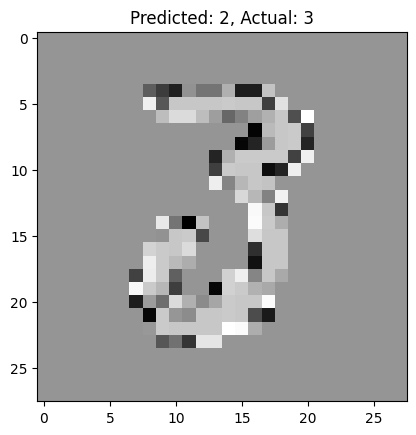

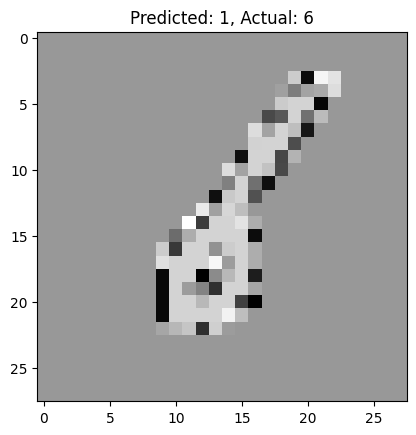

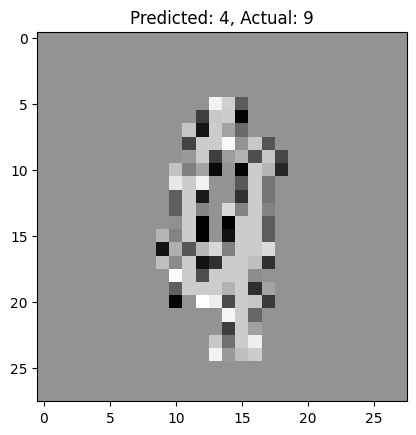

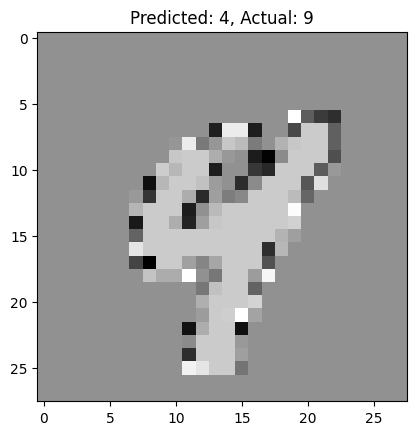

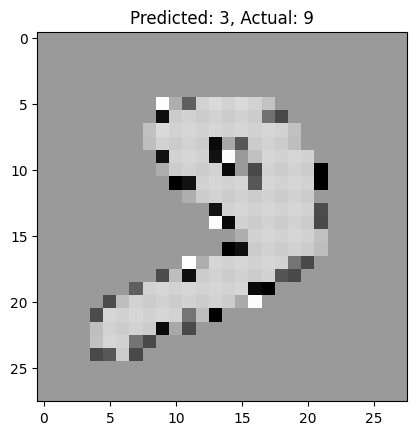

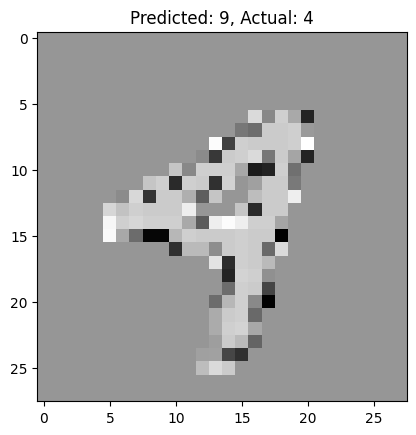

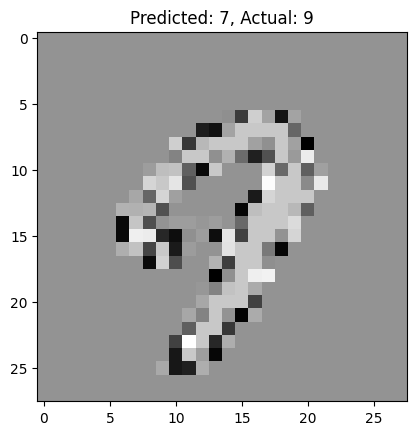

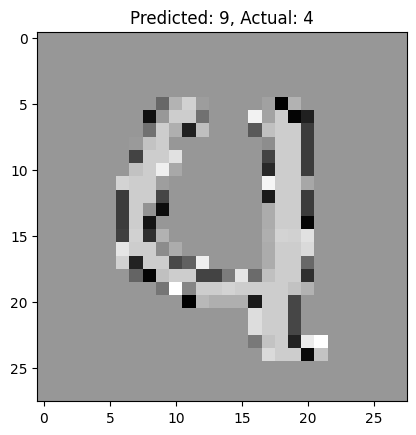

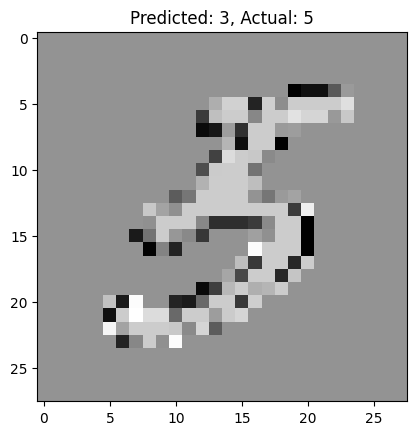

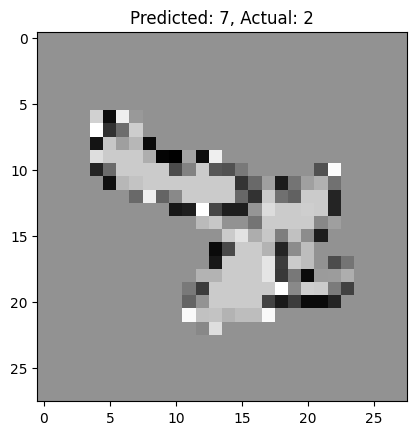

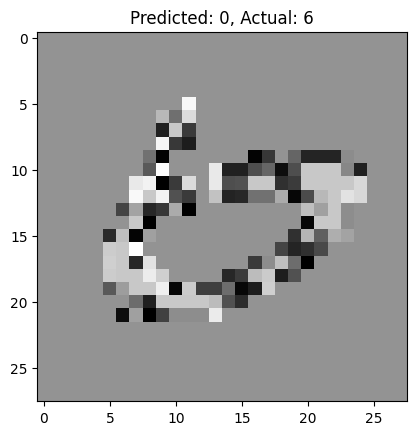

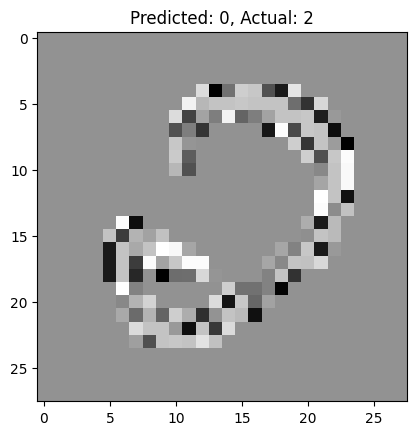

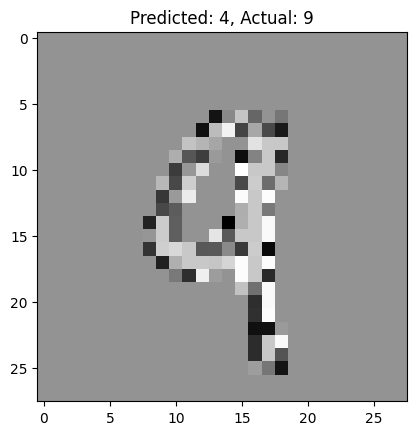

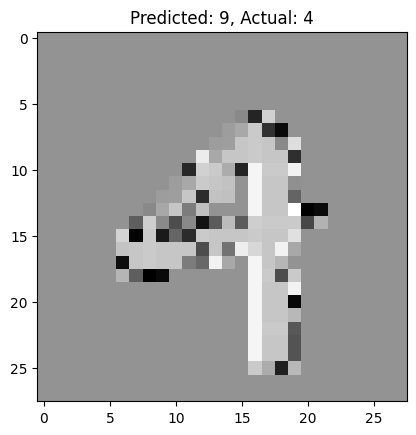

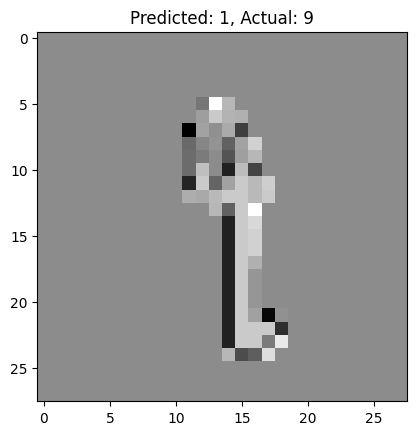

Accuracy: 0.9839


In [ ]:
# Переключитесь в режим оценки
model.eval()

correct = 0
total = 0

# Пройдите по итератору ValDataloader
for inputs, labels in val_dataloader:
    # Передайте входное изображение через модель
    outputs = model(inputs)
    # Получите прогнозы модели
    _, predicted = torch.max(outputs.data, 1)
    # Увеличьте счетчик правильных ответов
    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    # Отобразите изображения с верным ответом и прогнозами
    for i in range(len(inputs)):
        if predicted[i] != labels[i]:  # если прогноз верен
            plt.imshow(torchvision.transforms.ToPILImage()(inputs[i]), cmap='gray')
            plt.title(f"Predicted: {predicted[i].item()}, Actual: {labels[i].item()}")
            plt.show()

# Вычислите и выведите точность
accuracy = correct / total
print(f"Accuracy: {accuracy}")

### Домашнее задание

По аналогии с предыдущим примером, обучите нейронную сеть, у которой следущие слои:

- Сверточный слой с 10 ядрами размером 5
- Функция активации ReLU
- Уменьшить картинку в 2 раза (по каждому измерению)
- Сверточный слой с 20 ядрами размером 5
- Функция активации ReLU
- Уменьшить картинку в 2 раза (по каждому измерению)
- Полносвязный слой со 128 нейронами
- Функция активации ReLU
- Выходной слой

In [ ]:
# ваш код здесь